<a href="https://colab.research.google.com/github/nehal35/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing libraries & loading Dataset**

In [124]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# setting max display column limit to 20
pd.set_option("display.max_columns",20)
#set style 
plt.style.use('seaborn')
# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [125]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:

# CSV file loaction path
file_path="/content/drive/MyDrive/Bike sharing demand prediction/Copy of SeoulBikeData.csv"

In [127]:
# reading csv file
bike_df=pd.read_csv(file_path,encoding="latin")

# **Reading dataset**

In [128]:
# lets see dataframe
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [129]:
# Check last 5 rows
bike_df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


## **copy of dataframe**

In [130]:
# creating copy of dataframe
bike_df_copy=bike_df.copy()

In [131]:
# printing all columns/features
bike_df_copy.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [132]:
# cheaking shape of dataframe
bike_df_copy.shape

(8760, 14)

# Our dataset have around 8,760 rows and 14 columns
# Statical summary of data

In [133]:
# statical summary
bike_df_copy.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [134]:
bike_df_copy.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


**From the statical summary we can check mean,maximum,minimum values of each feature**

# **Pre-Processing of data**
Preprocessing of data is important for highest accuracy of our model.before fitting our data to machine learning model ,it's important that data must be cleaned and also without outlier (if this not done then our model will never learn true pattern of data).If any particular model have some assumption then we also need to take care of these assumption before fitting our data to model . for example in linear regression we have some assumption like (multicollinearity,homodasticity,normally distribution).Let's start pre-processing of data so that we can get highest accuracy in predictions

Before going further it's important to understand about feature of our dataframe and also what type of data each columns contain



# **Checking info of dataframe**

In [135]:
# checking info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Most of the feature in our dataframe are numeric type and some are categorical type but "Date" column of our dataframe contain datetime type information but in given data set its data type is object so let's convert datatype of "Date" column. Now let's check for null value/missing value in each column. if there is any null value we will try to replace null value by mean,median or mode.if null value in any column is greater than fourty percent we will drop that particular column from dataset.Treatment of null value is important because it will make our analysis much stronger

In [136]:
#checking null values and sorting in descending order
bike_df_copy.isnull().sum().sort_values(ascending=True)


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Ohh ,that's great In our dataset there is no null / missing values

Till now we checked for null/missing value and also datatype of our dataframe columns,Now let's check for outlier.

For a particular feature outlier is basically either very less or either very extreme value compared to all other value to that feature.

Identification of potential outliers is important because ,An outlier may indicate bad data. For example, the data may have been puted incorrectly or an experiment may not have been run correctly.

# **Let's check for the outlier in our data**


In our dataframe we have some categorical features as well so i am just creating a list of features which are numeric outlier detection ,let's creat box plot for all numeric features

In [137]:
#creating list of numeric features
List_of_numerics=['Rented Bike Count','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


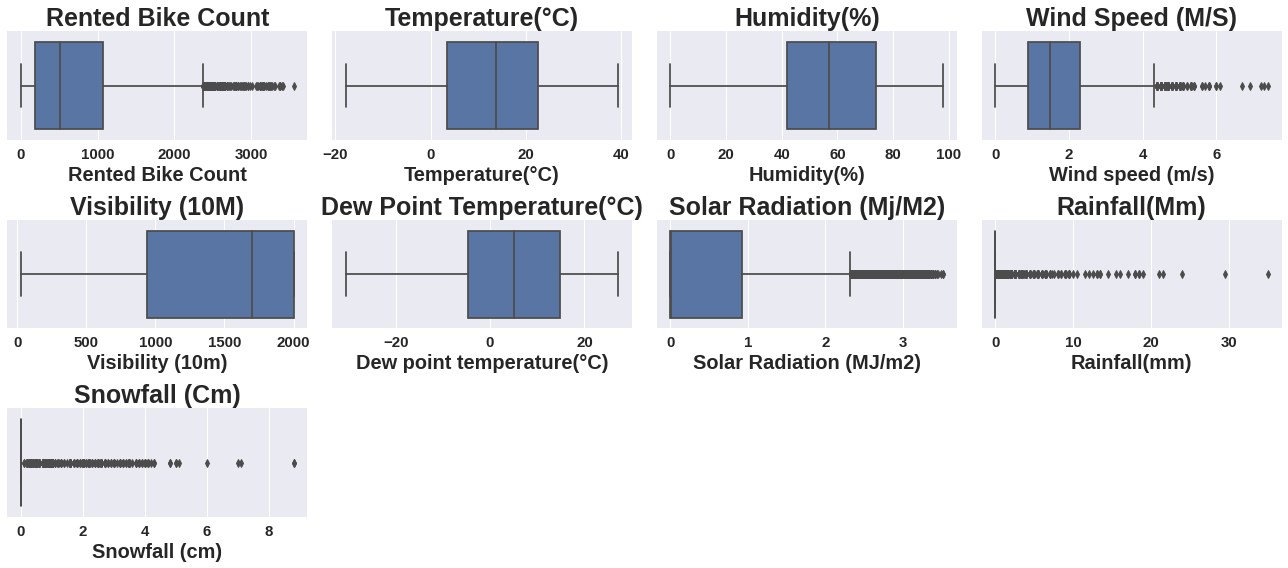

In [138]:
plt.figure(figsize=(18,8))
for n,column in enumerate(List_of_numerics):
  plt.subplot(3, 4, n+1)
  sns.boxplot(bike_df_copy[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [139]:
bike_df_copy.shape

(8760, 14)

In [140]:
bike_df_copy['Rented Bike Count'].max()

3556

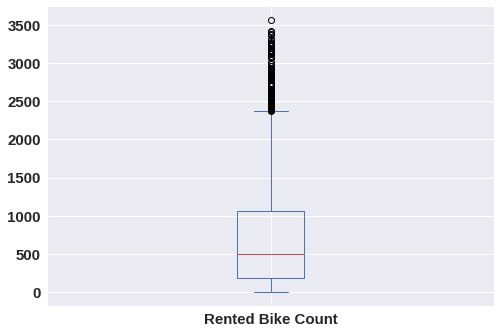

In [141]:
bike_df_copy['Rented Bike Count'].plot(kind='box')

In [142]:
# Finding Q1, Q3 and IQR
Q1 =  bike_df_copy['Rented Bike Count'].quantile(0.25) #25%
Q3 = bike_df_copy['Rented Bike Count'].quantile(0.75) # 75%
IQR = Q3 - Q1
print(IQR)

874.25


In [143]:
# The outlier values
bike_df_copy[(bike_df_copy['Rented Bike Count'] < Q1-1.5*IQR ) | (bike_df_copy['Rented Bike Count'] > Q3+1.5*IQR)]['Rented Bike Count']

2946    2401
2994    2402
3114    2401
3210    2404
3282    2692
        ... 
7746    2631
7818    2613
7842    2415
7866    2612
7890    2632
Name: Rented Bike Count, Length: 158, dtype: int64

In [144]:
# The outlier values
bike_df_copy[(bike_df_copy['Rented Bike Count'] < Q1-1.5*IQR ) | (bike_df_copy['Rented Bike Count'] > Q3+1.5*IQR)]['Rented Bike Count'].count()

158

In [145]:
# Remove outliers from our data set
outliers = (bike_df_copy['Rented Bike Count'] >= Q1 - 1.5 * IQR) & (bike_df_copy['Rented Bike Count'] <= Q3 + 1.5 *IQR)
bike_df_copy = bike_df_copy.loc[outliers] 

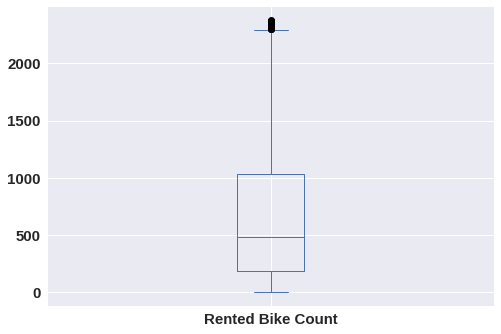

In [146]:
bike_df_copy['Rented Bike Count'].plot(kind='box')

In [147]:
bike_df_copy.shape

(8602, 14)

# **Converting date column to date time and extracting day,month and year**

In [148]:
#converting datatype of "Date" column
bike_df_copy['Date']=pd.to_datetime(bike_df_copy['Date'])

In [149]:
#creating three new column /extracting day,month,year from date column
bike_df_copy['day'] = bike_df_copy['Date'].dt.day
bike_df_copy['month'] = bike_df_copy['Date'].dt.month
bike_df_copy['year'] = bike_df_copy['Date'].dt.year
bike_df_copy['name_of_day'] = bike_df_copy.Date.dt.day_name()

In [150]:
bike_df_copy.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year,name_of_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [151]:
#dropping date column
bike_df_copy.drop('Date',axis=1,inplace=True)

In [152]:
#checking values count
bike_df_copy['Rented Bike Count'].value_counts().reset_index().head(-5)

,index,Rented Bike Count
0,0,295
1,122,19
2,262,19
3,223,19
4,165,18
...,...,...
2014,1439,1
2015,1879,1
2016,2320,1
2017,887,1



In our dataframe we have 295 rows where Rented bike count is 0 ,it's possiable becuase of non Functioning day.

# **Exploratory data analysis**
## **Distribution of features**
### **Numerical columns**

In [153]:
#creating list of numeric features
List_of_numerics=['Rented Bike Count','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


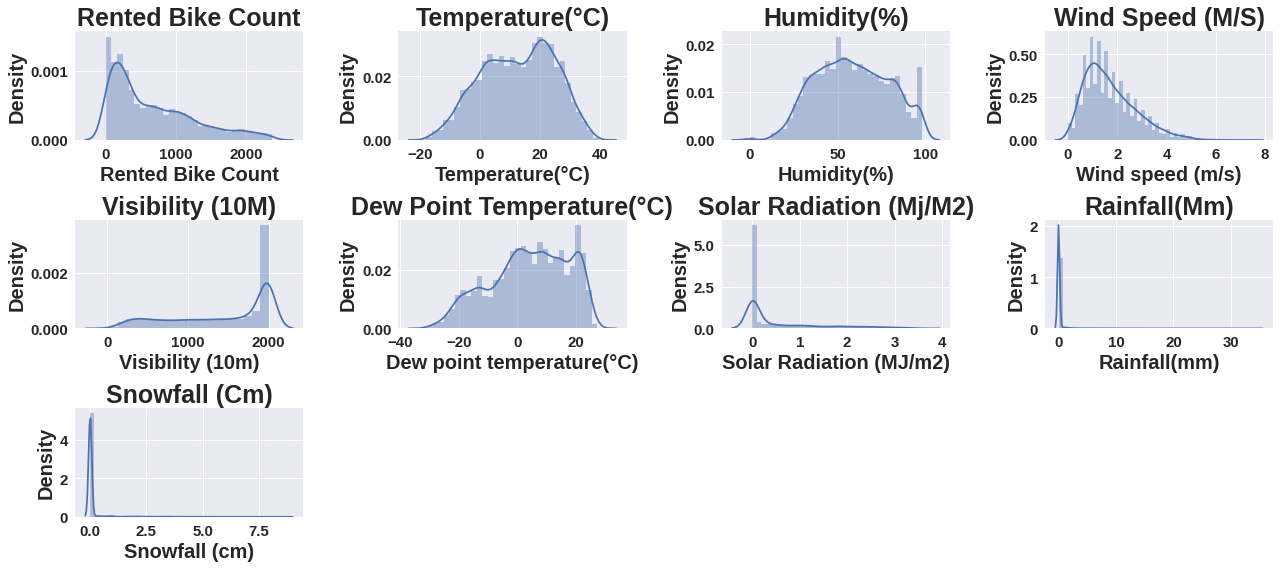

In [154]:
# Visualizing the distributions.
plt.figure(figsize=(18,8))
for n,column in enumerate(List_of_numerics):
  plt.subplot(3, 4, n+1)
  sns.distplot(bike_df_copy[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

# **insights**

From the above distribution ,we can say that:-
 1. In our dataset Weather condition feature like ( Tempreture,wind speed,rainfall ) are either normally or either uniform distributed (Not exactly)
 
2. Others columns are positively and neagtively skewd

# **Categorical columns**
**Seasonal trend (how demand of bike changes with season )**

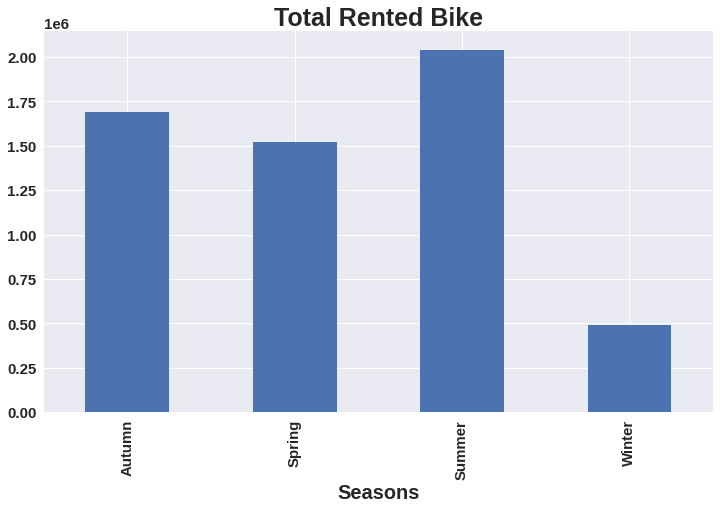

In [155]:
# creating plot
plt.figure(figsize=(12,7))
plt.title("Total Rented Bike")
bike_df_copy.groupby('Seasons')['Rented Bike Count'].sum().plot.bar()

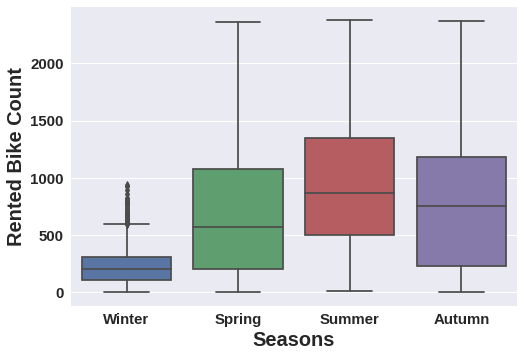

In [156]:
sns.boxplot(x=bike_df_copy["Seasons"],y=bike_df_copy['Rented Bike Count'])
plt.show()

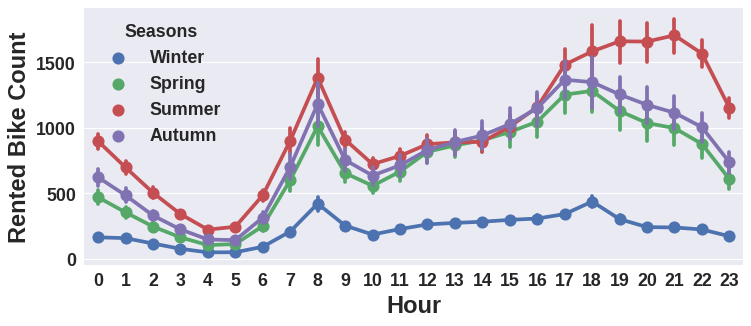

In [157]:
plt.figure(figsize=(10,4), dpi=85)
sns.pointplot(data=bike_df_copy, x="Hour", y="Rented Bike Count", 
              hue="Seasons")

# **Observations**
* As we can see from above chart that demand of bike is very less during winter season,i think this is because of very less temperature during winter and on other seasons demand of bike is not exactly same but higher 
* demand of bike is highest during summer due to less rainfall and snowfall people prefer renting bikes to travel



# **How demand of bike change when there is holiday.**

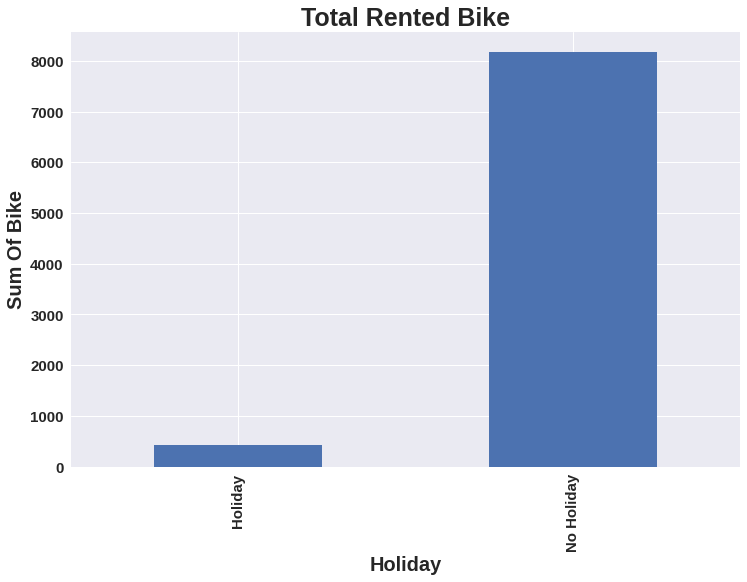

In [158]:
# creating plot
plt.figure(figsize=(12,8))
plt.title("Total Rented Bike")
plt.xlabel('Seasons')
plt.ylabel("Sum Of Bike")
bike_df_copy.groupby('Holiday')['Rented Bike Count'].count().plot.bar()

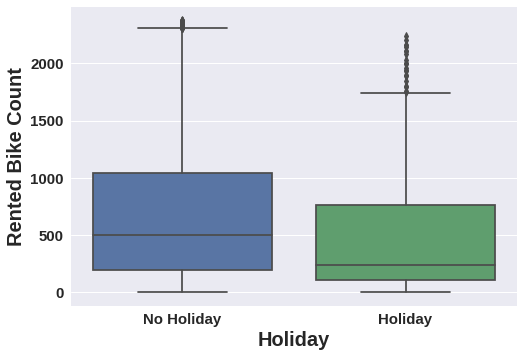

In [159]:
sns.boxplot(x=bike_df_copy['Holiday'],y=bike_df_copy['Rented Bike Count'])
plt.show()

In [160]:
bike_df_copy["Holiday"].value_counts()

No Holiday    8171
Holiday        431
Name: Holiday, dtype: int64

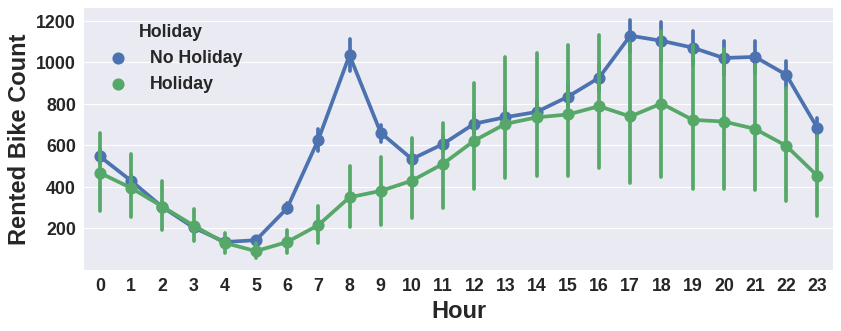

In [161]:
plt.figure(figsize=(10,4), dpi=85)
sns.pointplot(data=bike_df_copy, x="Hour", y="Rented Bike Count", hue='Holiday')
plt.tight_layout()

# **Observations**
* From the above charts we can say that when there is no holiday demand of bike is very high and when there is holiday demand of bike is very less ,i think it's becuase during holiday people don't travel for either to office or to any work

* Its obvious that on holidays people temnd to take rest so demand of bike on

* holidays are low 

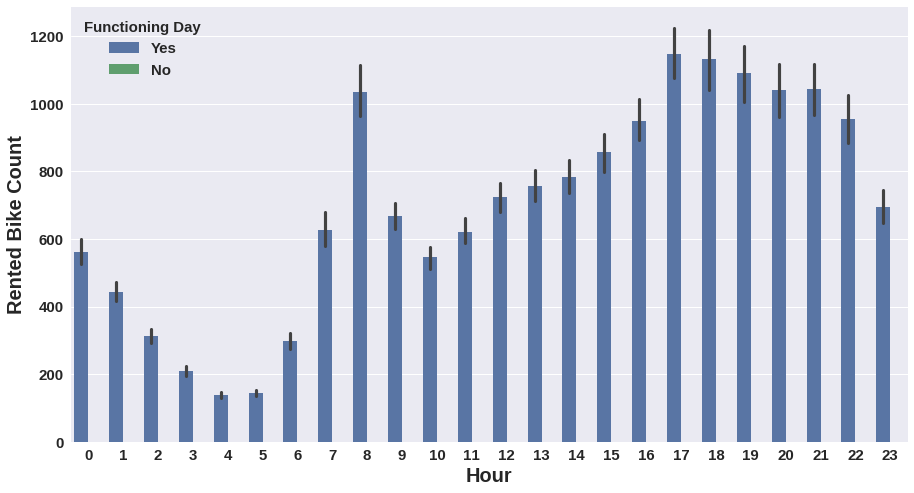

In [162]:
plt.figure(figsize=(15,8))
sns.barplot(x="Hour",y='Rented Bike Count',hue='Functioning Day',data=bike_df_copy)

In [163]:
bike_df_copy['Functioning Day'].value_counts()

Yes    8307
No      295
Name: Functioning Day, dtype: int64

# **Observation**
1. From above bar graph we get to know that there was no bike rent on
non functioning day

# **Yearly trend (Bike demand increasing over year or not)**

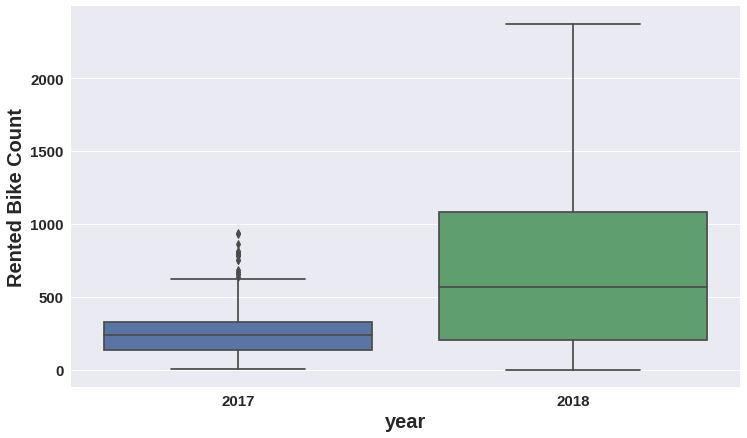

In [164]:
# creating plot 
plt.figure(figsize=(12,7))
sns.boxplot(data=bike_df_copy,x='year',y='Rented Bike Count')

# **Observation**

 it's interesting right,the demand of bike drastically increasing with year, i think it is because of:-
 * Due to high traffic in city travelling through bike is easier 
 * cost effective

# **Monthly trend (How demand of bike changes over month )**

In [165]:
# creating a function
Month_list=['January','February','March','April','May','June','July','August','September','October','November','December']
def return_month(integer):
  ''' This function take integer as input and return corresponding month name'''
  return Month_list[integer-1]

In [166]:
# creating month name column in dataframe 
bike_df_copy['Month_name']=bike_df_copy['month'].apply(return_month)

In [167]:
bike_df_copy['Month_name'].value_counts().sort_values(ascending=False)

January      741
March        738
August       734
December     734
July         732
October      731
May          719
November     715
September    709
April        703
June         675
February     671
Name: Month_name, dtype: int64

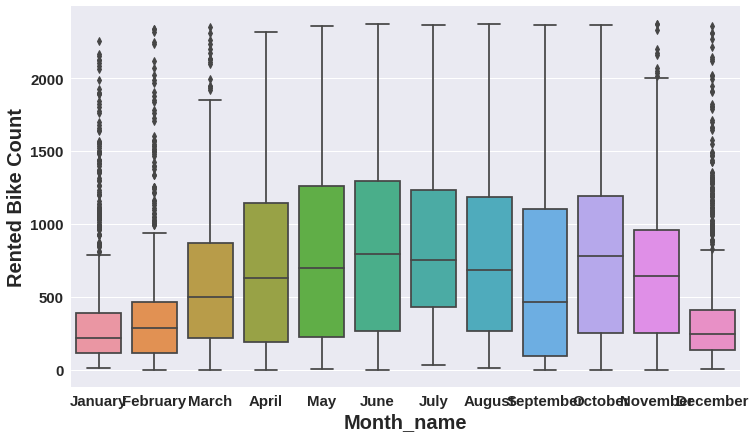

In [168]:
# creating plot
plt.figure(figsize=(12,7))
sns.boxplot(data=bike_df_copy,x='Month_name',y='Rented Bike Count')

In [169]:
# dropping month_name column
bike_df_copy.drop('Month_name',axis=1,inplace=True)

# **Observation** 

* We see that number of ride count drastically increases between April to june which are comparitively summer season

* From the above boxplot we can say that at starting and ending of year demand of bike decrease (because of winter season) apart of these month demand of bike in other month is equal. 

# **Weekdays trend**
In our dataframe we have date columns using date we can find out it is weekend or weekdays

In [170]:
bike_df_copy.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'year', 'name_of_day'],
      dtype='object')

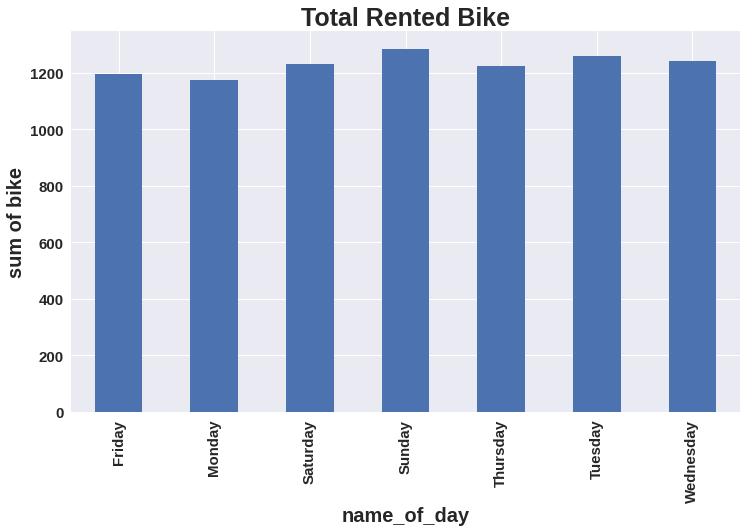

In [171]:
# creating plot 
plt.figure(figsize=(12,7))
plt.title("Total Rented Bike")
plt.xlabel('name_of day')
plt.ylabel('sum of bike')
bike_df_copy.groupby('name_of_day')['Rented Bike Count'].count().plot.bar()

In [172]:
bike_df_copy.groupby(['name_of_day'])['Rented Bike Count'].count().sort_values(ascending=False)

name_of_day
Sunday       1282
Tuesday      1257
Wednesday    1241
Saturday     1230
Thursday     1223
Friday       1196
Monday       1173
Name: Rented Bike Count, dtype: int64

Almost same demand on everyday of the week


# **creating function**

In [173]:
#creating function
def return_days(str_):
  '''
  This function return days as input and return bins based on required bike count
  '''
  if str_=='Sunday'or'Monday'or'Tueday'or'Wednesday'or'Thursday'or'Friday'or'Saturday':
    return 1

In [174]:
bike_df_copy['name_of_day']=bike_df_copy['name_of_day'].apply(return_days)

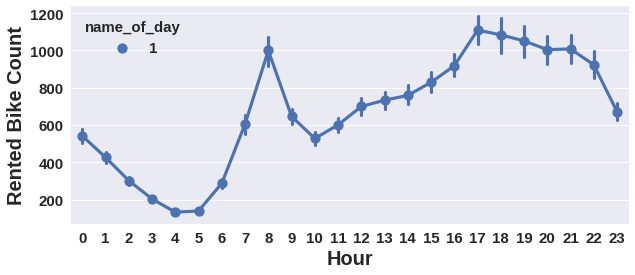

In [175]:
plt.figure(figsize = (10,4))
sns.pointplot(data=bike_df_copy, x="Hour", y="Rented Bike Count", hue='name_of_day')

In [176]:
bike_df_copy.drop('name_of_day',axis=1,inplace=True)


NO meaning full insight found , demand of bike is almost same throughout the week

# **Day trend (Number of bike required on each day of the month):-**

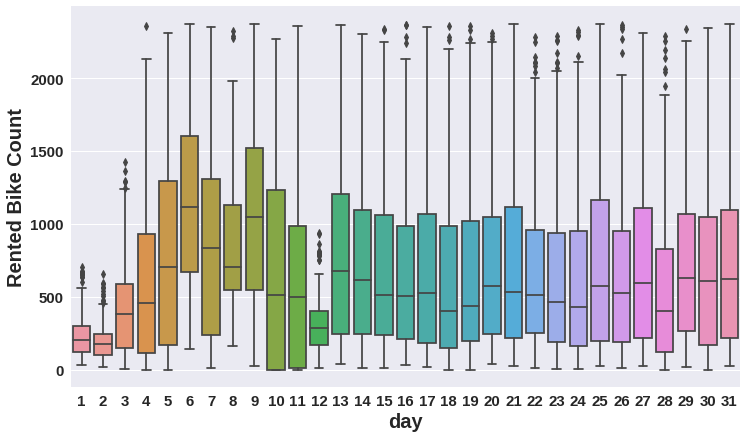

In [177]:
# creating plot 
plt.figure(figsize=(12,7))
sns.boxplot(data=bike_df_copy,x='day',y='Rented Bike Count')

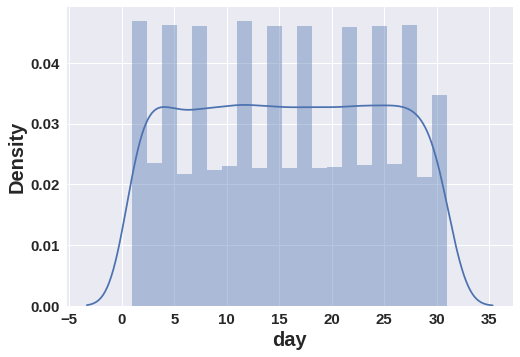

In [178]:
sns.distplot(bike_df_copy['day'])

# **Observation**

* on the day of ecah month demand of the bike is not exactly same but uniform, so from above boxplot we can say that demand of bike changes with seasons,holiday ,weather condition but not with day.
* so let's remove day column from dataframe because demand of bike not changing much on perticular day of month

In [179]:
# removing day column
bike_df_copy.drop('day',axis=1,inplace=True)

# **Hourly Trend(number of bike required vat each hour):-**

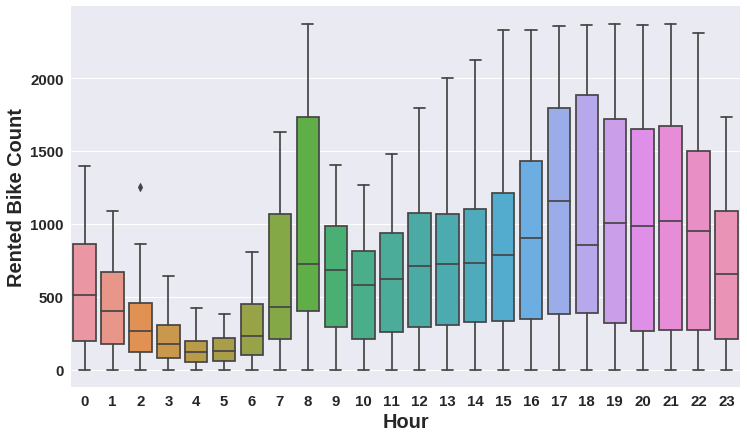

In [180]:
#creating plot 
plt.figure(figsize= (12,7))
sns.boxplot(data=bike_df_copy,x='Hour',y='Rented Bike Count')

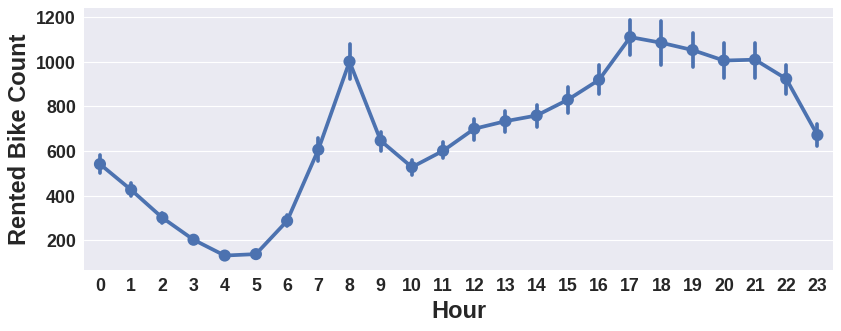

In [181]:
plt.figure(figsize=(10,4), dpi=85)
sns.pointplot(data=bike_df_copy, x="Hour", y="Rented Bike Count")
plt.tight_layout()

# **Observation**
* Possible reason might be that demond is high from 7-10 and from 15-19 IST this is because in most of the metropoliton cities this is the peak office time and more people would be renting bikes ,this is just another possible reason

* From the above line plot we can say that in early morning from 5 AM to 8 AM ,there is increasing trend in required number of bikes. i think this is because many people travel through buses and train and they reach in there city in early morning as most people preffered travling during nights, also there is increasing trend in required bike in morning from 10 AM to 6PM evening ,i think this is because of office timimg or work timing ,so many people reach to there office or work location by bike.

# **Number of bike(bike trend) at different-different wheather condition:-**

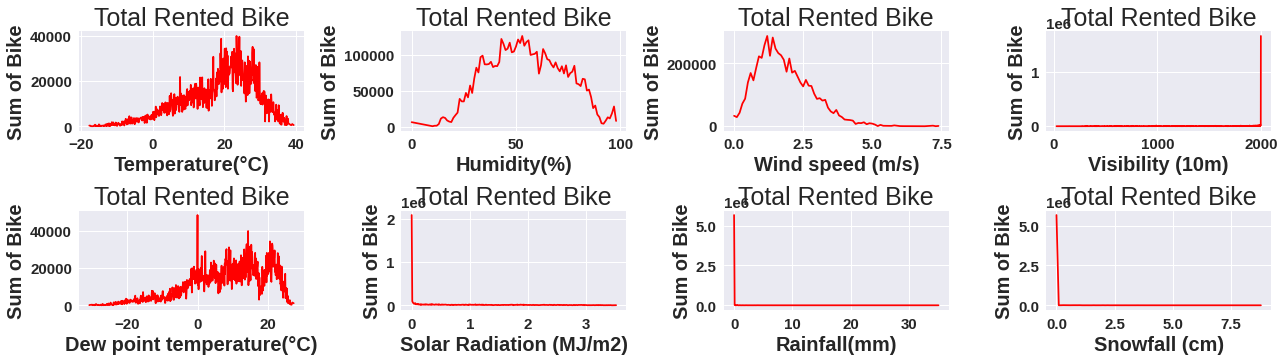

In [182]:
whethr_columns=['Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
plt.figure(figsize= (18,7))
for n,col in enumerate (whethr_columns):
 plt.subplot(3,4,n+1)
 plt.title("Total Rented Bike",weight='normal')
 plt.xlabel(col)
 plt.ylabel("Sum of Bike")
 plt.tight_layout()
 bike_df_copy.groupby(col)['Rented Bike Count'].sum().plot(color='r')


# **Observation**
* As we can seen from above garph that at lower and higher tempreture required number of bike is less,same trend with humidity

* when wind speed is higher ,number of required bike is less. we think these are very basic things because of health concern. during high/low tempreture and high wind speed people not preffer bike for travalling from one place to other place.

* Also during rainfall,snowfall,less visibility required bike is very less ,it's obvious, right.as we always concerned about our health and safety so during rainfall ,snowfall, solar radiation, no body prefer bike for travalling

# **Feature Engineering**
## **Lable encoding**
### **Seasons**

In [183]:
#creating dummy variable for categorical columns
feature_list=['Seasons']
for col in feature_list:
  bike_df_copy = pd.get_dummies(data= bike_df_copy,columns =[col], drop_first=False)

In [184]:
bike_df_copy.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,1,2017,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,1,2017,0,0,0,1


# **Year**
"Yearly Trend" analysis we have seen that demand of bike incresing over year,in our dataset we have two year (2017,2018),

So let's assign weightage to year, because bike demand increasing over year so we will assign lower year with low weightage and higher year with high weightage

In yearly weightage we will be creat bins based on quartely



In [185]:
# creating function
def year_weightage(month,year):
  '''this function take year vas input and return weightage of year'''
  if(year==2017)and (month<3):
    return 1
  elif(year==2017) and (month>3) and (month<=6):
    return 2
  elif (year==2017) and (month>6) and (month<=9):
    return 3
  elif (year==2017) and (month>9) and (month<=12):
    return 4
  elif (year==2018) and (month<=3):
    return 5
  elif (year==2018) and (month>3) and (month<=6):
    return 6
  elif (year==2018) and (month>6) and (month<=9):
    return 7
  else:
    return 8

In [186]:
#creating year weightage new column
bike_df_copy['month_year_bins']=bike_df_copy.apply(lambda x:year_weightage(x.month,x.year),axis=1)
bike_df_copy

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,month_year_bins
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,1,2017,0,0,0,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,1,2017,0,0,0,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,1,2017,0,0,0,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,1,2017,0,0,0,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,1,2017,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,No Holiday,Yes,11,2018,1,0,0,0,8
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,No Holiday,Yes,11,2018,1,0,0,0,8
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,No Holiday,Yes,11,2018,1,0,0,0,8
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,No Holiday,Yes,11,2018,1,0,0,0,8


In [187]:
#dropping year column
bike_df_copy.drop('year',axis=1,inplace=True)
bike_df_copy.drop('month',axis=1,inplace=True)

# **Hour label encoding**

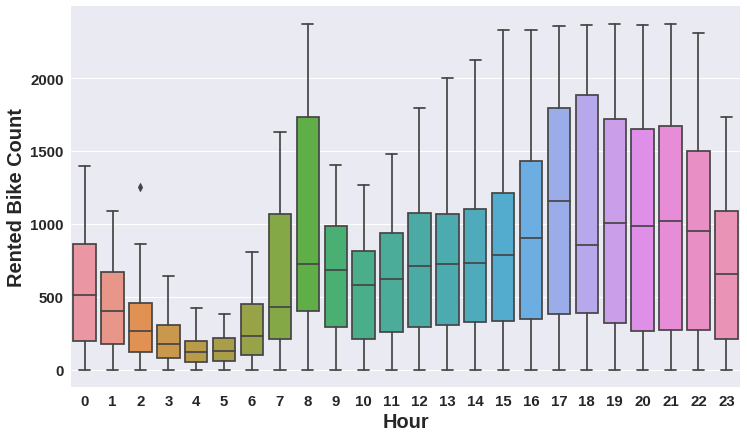

In [188]:
#creating plot 
plt.figure(figsize= (12,7))
sns.boxplot(data=bike_df_copy,x='Hour',y='Rented Bike Count')


As we can seen from above box plot that number of required bike count changes with different-different hours, In some hours required bike are less and in some hours required bike count are larger , based on how number of bike varies with hours we will creat some bins ,when number of bike required is high we will assign higher weightage to that hours and when number of bike required is less we assign less weightage to that particular hours.

In [189]:
#creating function
def return_hour_bin(inte):
  '''
  This function return hours as input and return bins based on required bike count
  '''
  if inte==18:
    return 8
  elif inte==8 or inte==17 or inte==19:
    return 7
  elif inte==20 or inte==21:
    return 6
  elif inte==22 or inte==16:
    return 5
  elif inte==0 or inte==10 or inte==11:
    return 3
  elif inte==1 or inte==2 or inte==6:
    return 2
  elif inte==3 or inte==4 or inte==5:
    return 1
  else:
    return 4

In [190]:
#creating  new column
bike_df_copy['Hour_bins']=bike_df_copy['Hour'].apply(return_hour_bin)

In [191]:
#dropping hour column
bike_df_copy.drop('Hour',axis=1,inplace=True)

# **One hot encoding**
## **Holiday**

In our dataframe we have 3 features "Season" , "Functioning Days" and "Holiday" which contain categorical values , we know that to fit data to our machine learning model we need all numerical features,so let's creat dummies for these 3 columns.

In [192]:
#creting function of One hot encoding of holiday columns
def return_encode(str_):
  '''
  This function return 1 if there is No holiday and return 0 if there is holiday
  '''
  if str_=='No Holiday':
    return 1
  else:
    return 0

In [193]:
#One Hot encoding for Holiday column
bike_df_copy['Holiday']=bike_df_copy['Holiday'].apply(return_encode)


# **Functioning Days**

In [194]:
#creting function of One hot encoding of Funtion Days columns
def return_encode(str_):
  '''
  This function return 1 if  Functioning Day=Yes and return 0 if  Functioning Day=NO
  '''
  if str_=='Yes':
    return 1
  else:
    return 0


In [195]:
#One Hot encoding for Funtion Days column
bike_df_copy['Functioning Day']=bike_df_copy['Functioning Day'].apply(return_encode)


In [196]:
bike_df_copy['Functioning Day'].value_counts()

1    8307
0     295
Name: Functioning Day, dtype: int64

# **Distribution of Target variable**


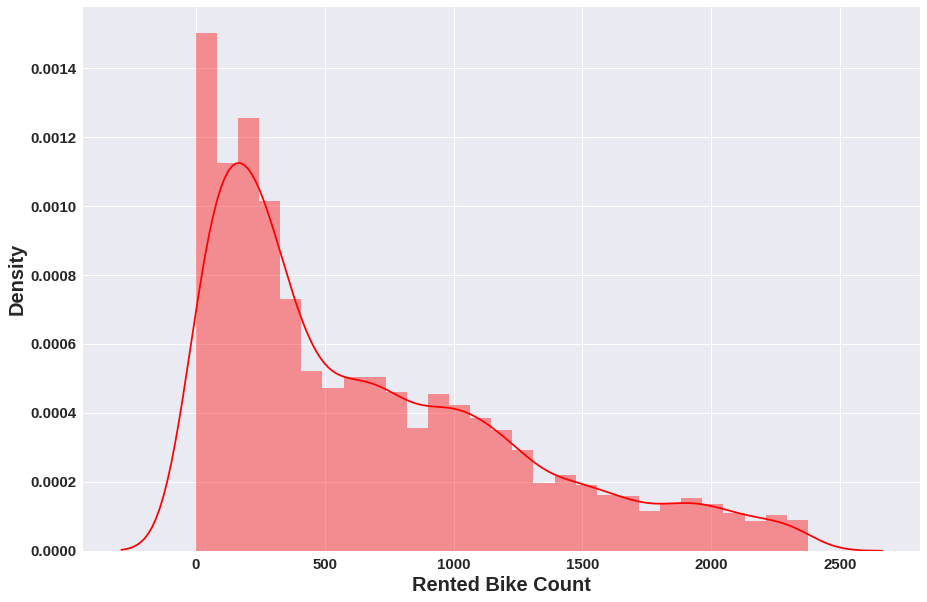

In [197]:
# dependent variable 'Rented Bike Count' distribution
plt.figure(figsize=(15,10))
sns.distplot(bike_df_copy['Rented Bike Count'],color='r')

In [198]:
bike_df_copy['Rented Bike Count'].skew()

0.9619555727171729

# **Observation**

* As we can see from above plot that our target variable is positive skewed distributed not normal,Linear regression will make more reliable predictions if our independent and dependent variables have a normal distribution,earlier in feature distribution we already seen that not all but some independent features are normally distributed. so let's do transformation of our target feature
* We will do square-root transformation on our target variable.

### **we will do square-root transformation on our target variable**

In [199]:
bike_df_copy['Rented Bike Count'].value_counts()

0       295
122      19
262      19
223      19
165      18
       ... 
1319      1
1321      1
2359      1
2313      1
595       1
Name: Rented Bike Count, Length: 2024, dtype: int64

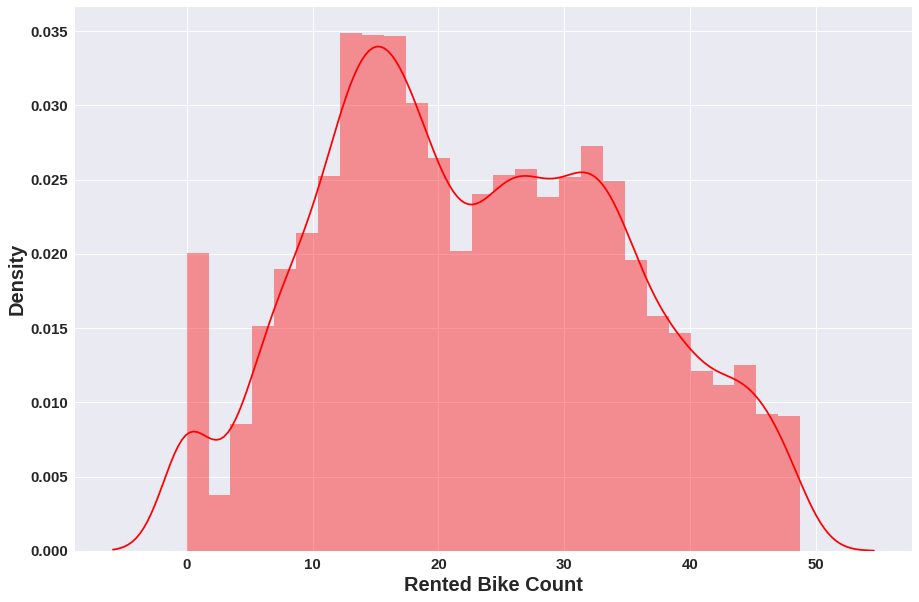

In [200]:
# creating plot after square-root transformation
plt.figure(figsize=(15,10))
sns.distplot(np.sqrt(bike_df_copy['Rented Bike Count']),color="r")

**insights**

* After square-root transformation we can see from above plot that our target variable is normally distributed, so let's creat new column in our dataframe which contain square root of our target variable.

In [201]:
#creating function
def return_square_root(integer):
  '''
  This function take integer as input and return
  square-root of that integer.
  '''
  return np.sqrt(integer)

In [202]:
#creating new column root rented bike count
bike_df_copy['Root_rented_bike_count']=bike_df_copy['Rented Bike Count'].apply(return_square_root)


# **Linear Dependencies**

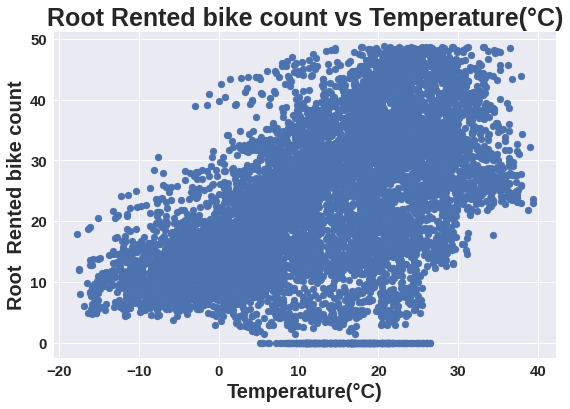

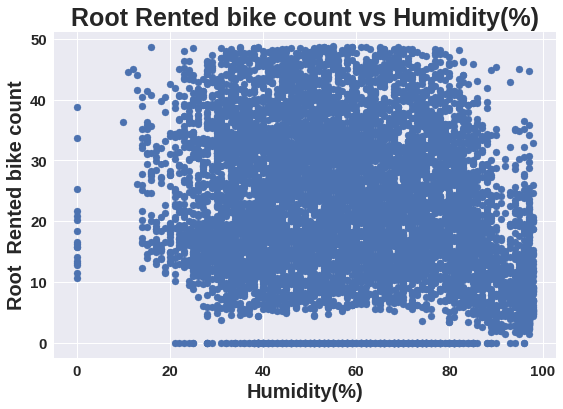

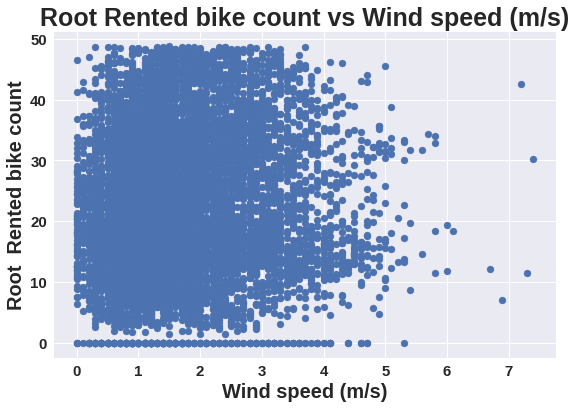

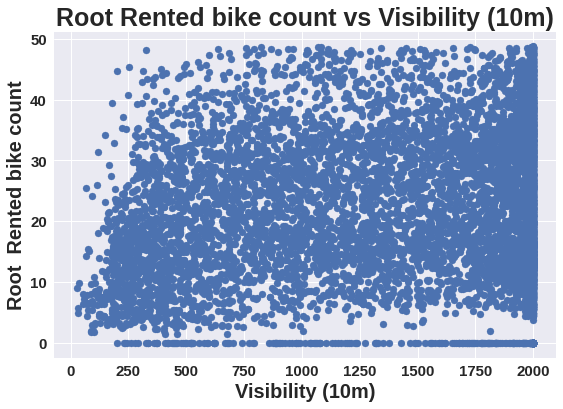

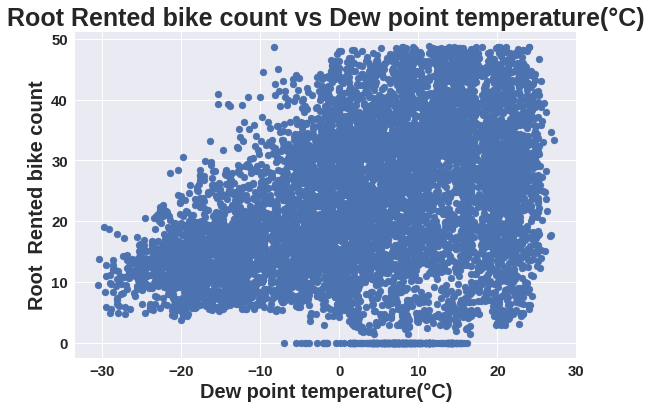

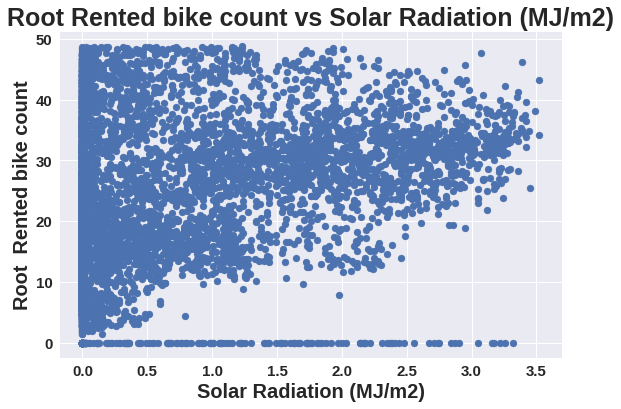

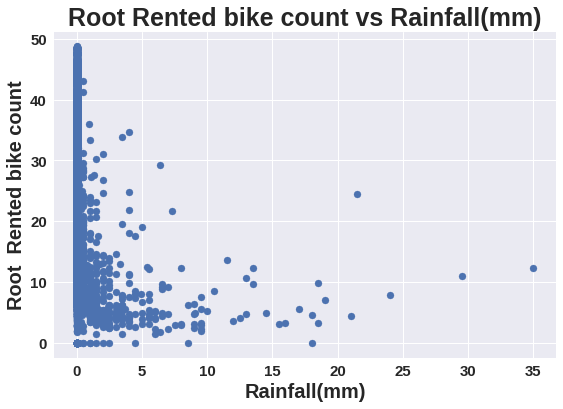

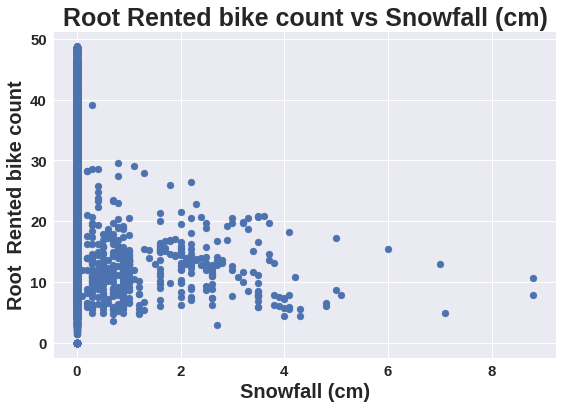

In [203]:
#creating list of numeric features
List_of_numerics_feature=['Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for col in List_of_numerics_feature:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature =bike_df_copy[col]
  label =bike_df_copy['Root_rented_bike_count']
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Root  Rented bike count')
  ax.set_title('Root Rented bike count vs ' + col )


# **Insights**

From above scatterplot we can say that some independent variable with dependent variable are linear related and some are non-linearly related.

Now, lets find the correlation between the variables to further analyse the dependencies between variables.

**Biased columns ⬇**

In [204]:
bike_df_copy['Visibility (10m)'].value_counts().reset_index()

,index,Visibility (10m)
0,2000,2184
1,1995,33
2,1985,28
3,1989,28
4,1999,28
...,...,...
1777,1444,1
1778,1468,1
1779,1743,1
1780,1441,1


In [205]:
bike_df_copy['Rainfall(mm)'].value_counts().reset_index()

,index,Rainfall(mm)
0,0.0,8075
1,0.5,116
2,1.0,66
3,1.5,56
4,0.1,45
...,...,...
56,1.9,1
57,3.3,1
58,17.0,1
59,1.4,1


In [206]:
bike_df_copy['Snowfall (cm)'].value_counts().reset_index()

,index,Snowfall (cm)
0,0.0,8159
1,0.3,42
2,1.0,39
3,0.9,34
4,0.5,34
5,0.7,31
6,0.8,22
7,2.0,22
8,0.4,21
9,1.6,19


In [207]:
bike_df_copy['Solar Radiation (MJ/m2)'].value_counts().reset_index()

,index,Solar Radiation (MJ/m2)
0,0.00,4294
1,0.01,126
2,0.02,82
3,0.03,65
4,0.06,55
...,...,...
340,3.38,1
341,2.97,1
342,3.44,1
343,3.49,1


# **Multicollinearity and correlation between variable**
## **correlation heatmap**

In [208]:
#dropping rented bike count bcz our target feature is root of rented bike count only in linear regression medel
bike_dff=bike_df_copy.drop('Rented Bike Count',axis=1)
#bike_dff=bike_df_copy[bike_df_copy['Functioning Day']!=0]
#bike_dff=Bike_dff[bike_dff['Functioning Day']!=0]

In [209]:
bike_dff['Functioning Day'].value_counts()

1    8307
0     295
Name: Functioning Day, dtype: int64

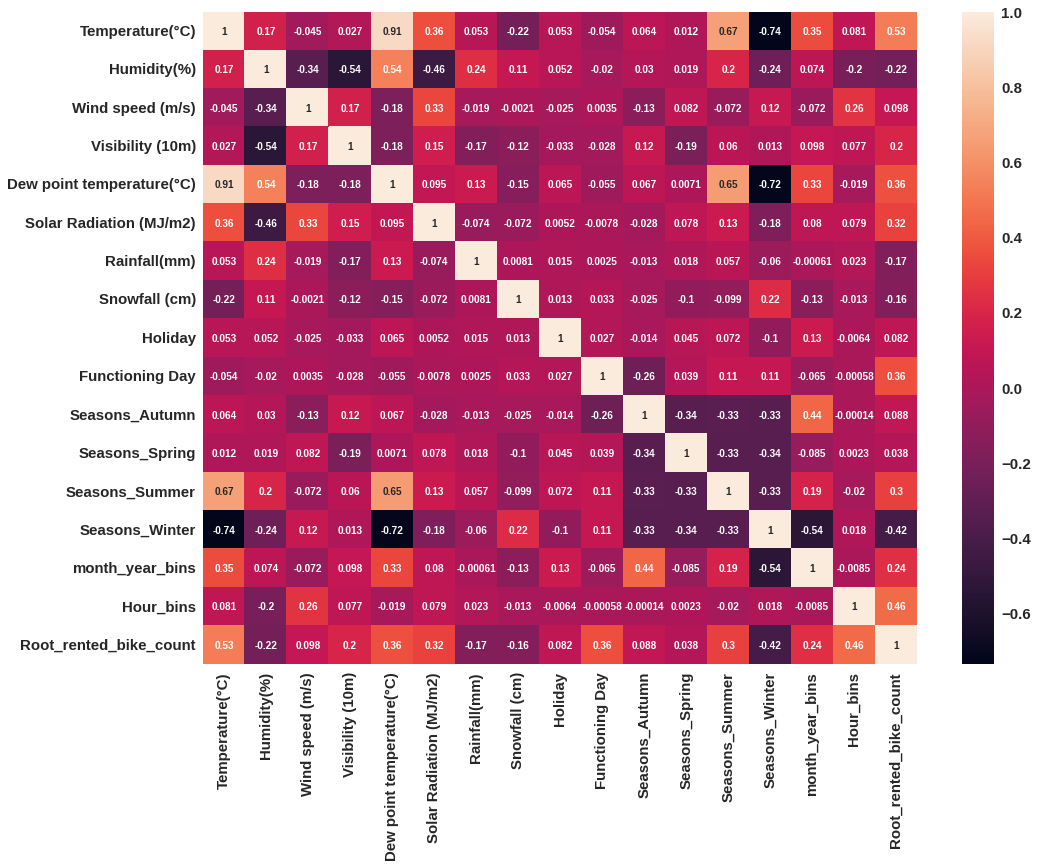

In [210]:
#creating heatmap
plt.figure(figsize = (16,12))
sns.heatmap(bike_dff.corr(),annot=True)

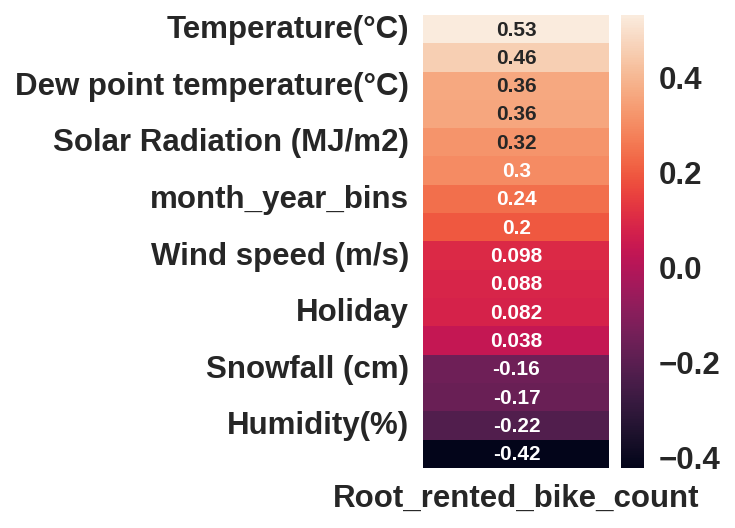

In [211]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(bike_dff.corr()[["Root_rented_bike_count"]].sort_values
            (by="Root_rented_bike_count", ascending=False)[1:],annot=True)


# **Observation**

As we can see from above correlation heatmap that tempreture is highly correlated with Dew point tempreture ,so there is collinearity between these two features.

To remove multicollinearity from our data we need to remove either tempreture column or Dew point tempreture column

As we can see from heatmap that tempreture column has high correlation with our target variable (rented bike count) compare to Dew point tempreture ,so let's remove Dew point tempreture column from our dataframe.

Apart from these two features ,there is no high correlation between independent features of our data.

Season_summer and Season_winter is also highly correlated with tempreture,it's obvious becuase tempreture increase in summer and decreases in winter. so let's remove these two columns from dataframe.

In [212]:
bike_dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature(°C)            8602 non-null   float64
 1   Humidity(%)                8602 non-null   int64  
 2   Wind speed (m/s)           8602 non-null   float64
 3   Visibility (10m)           8602 non-null   int64  
 4   Dew point temperature(°C)  8602 non-null   float64
 5   Solar Radiation (MJ/m2)    8602 non-null   float64
 6   Rainfall(mm)               8602 non-null   float64
 7   Snowfall (cm)              8602 non-null   float64
 8   Holiday                    8602 non-null   int64  
 9   Functioning Day            8602 non-null   int64  
 10  Seasons_Autumn             8602 non-null   uint8  
 11  Seasons_Spring             8602 non-null   uint8  
 12  Seasons_Summer             8602 non-null   uint8  
 13  Seasons_Winter             8602 non-null   uint8

In [213]:
#dropping "Dew point tempreture", "Season summer" ,"Season winter" from dataframe
bike_dff.drop('Dew point temperature(°C)',axis=1,inplace=True)
bike_dff.drop('Seasons_Summer',axis=1,inplace=True)
bike_dff.drop('Seasons_Winter',axis=1,inplace=True)

# **VIF Calculation**

In [214]:
#calculation varience inflation factor for multicollineariity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  '''
  This function calculate varience inflation factor for feature .
  '''
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

# Varienece inflation factor help us in removing multicollinearity.

In [215]:
# calculating vif for features
calc_vif(bike_dff[[col for col in bike_dff.describe().columns if col not in ['Holiday','No_Holiday','Seasons_Autumn','Seasons_Spring','Seasons_Summer','year_weightage','Root_rented_bike_count','month_year_weightage',]]])


,variables,VIF
0,Temperature(°C),3.412821
1,Humidity(%),14.068851
2,Wind speed (m/s),4.651149
3,Visibility (10m),7.770446
4,Solar Radiation (MJ/m2),2.524121
5,Rainfall(mm),1.085669
6,Snowfall (cm),1.126363
7,Functioning Day,20.086039
8,month_year_bins,21.005726
9,Hour_bins,5.413973


In [216]:
calc_vif(bike_dff[[col for col in bike_dff.describe().columns if col not in ['Dew point temperature(°C)	','Holiday','No_Holiday','Seasons_Autumn','month_year_bins','Seasons_Spring','Seasons_Summer','year_weightage','Root_rented_bike_count','month_year_weightage','Functioning Day']]])


,variables,VIF
0,Temperature(°C),3.189300
1,Humidity(%),5.169854
2,Wind speed (m/s),4.593454
3,Visibility (10m),4.800298
4,Solar Radiation (MJ/m2),2.269724
5,Rainfall(mm),1.079815
6,Snowfall (cm),1.121317
7,Hour_bins,5.009394


In [217]:
bike_dff.drop('month_year_bins',axis=1,inplace=True)

As we calculated varience inflation factor for our dataframe features and we can say from above dataframe that for all numeric features varience inflation factor is less than 10, so we can keep these feature to fit in our linear regression machine learning model.

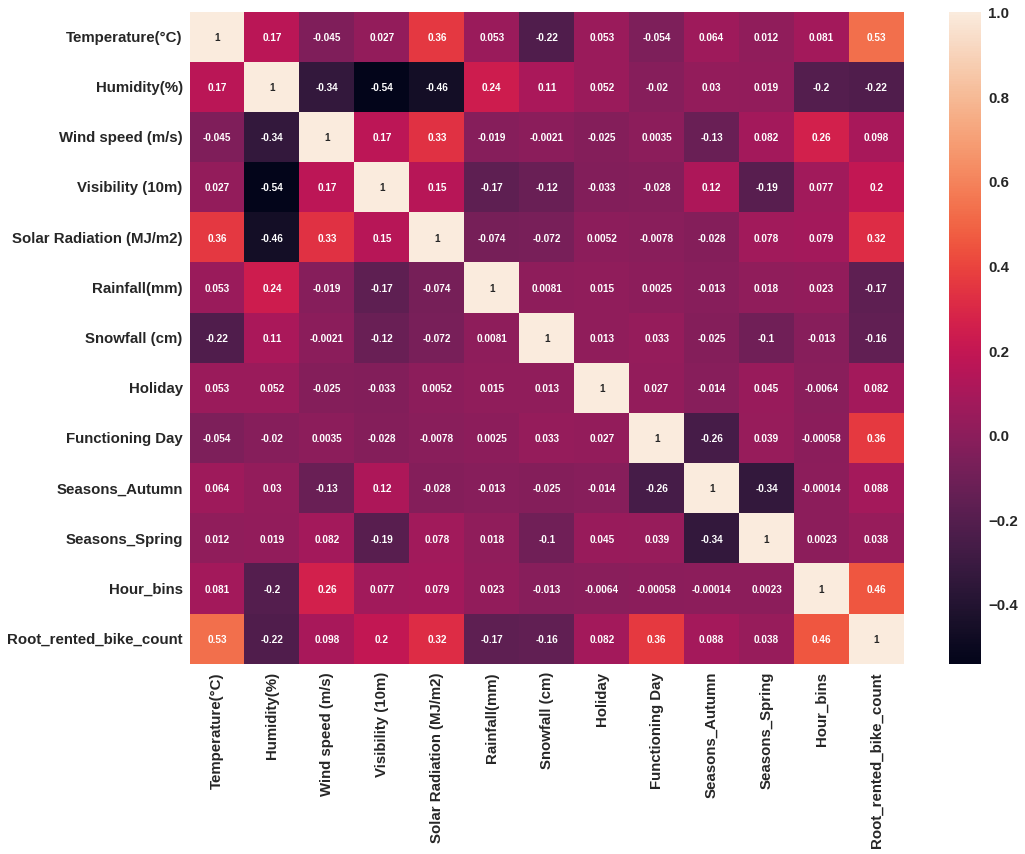

In [218]:
#creating heatmap
plt.figure(figsize = (16,12))
sns.heatmap(bike_dff.corr(),annot=True)

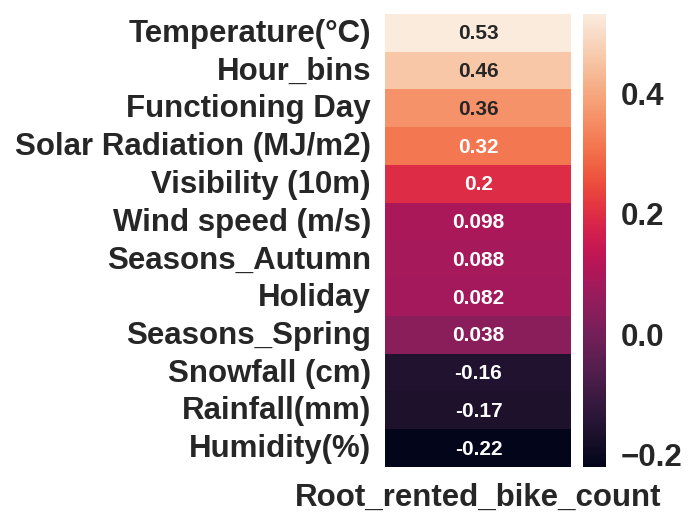

In [219]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(bike_dff.corr()[["Root_rented_bike_count"]].sort_values
            (by="Root_rented_bike_count", ascending=False)[1:],annot=True)

* Converting numerical columns into categorical clmns , such that it contains 90% of target variable count values.
* We did this because this columns are kind of biased one so

In [220]:
bike_dff['IsVisibility']=bike_dff['Visibility (10m)'].apply(lambda x: 1 if x>=2000 else 0)
bike_dff['IsRainfall']=bike_dff['Rainfall(mm)'].apply(lambda x:1 if x>=0.148687 else 0)
bike_dff['IsSnowfall']=bike_dff['Snowfall (cm)'].apply(lambda x:1 if x>=0.075068 else 0)
bike_dff['IsSolar_Radiation']=bike_dff['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x>=0.56911 else 0)
#Ater Conversion of numerical variable to categorical droping the original columns to avoid ambiguity
bike_dff.drop(['Visibility (10m)','Rainfall(mm)','Snowfall (cm)','Solar Radiation (MJ/m2)'],axis=1,inplace=True)

# **Final dataframe for LINEAR REGRESSION is ⬇**

In [221]:
bike_dff.head(2)

,Temperature(°C),Humidity(%),Wind speed (m/s),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Hour_bins,Root_rented_bike_count,IsVisibility,IsRainfall,IsSnowfall,IsSolar_Radiation
0,-5.2,37,2.2,1,1,0,0,3,15.937377,1,0,0,0
1,-5.5,38,0.8,1,1,0,0,2,14.282857,1,0,0,0


In [222]:
bike_dff.shape

(8602, 13)

# **Let's start to build machine learning models.**
## **Linear Regression model**
### **Implimentation of Linear Regression**
Linear regression machine learning model have some assumption.

* Linear Assumption: Linear regression assumes that the relationship between your independent and dependent is linear.

* Remove Collinearity: Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated,and more.

* so before fitting our data to linear regression model,let's first check for assumption.

In [223]:
# importing library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore') 

In [224]:
# creating dependent and independent for model
dependent_variable='Root_rented_bike_count'
independent_variables = list(set(bike_dff.columns.tolist()) - {dependent_variable})

In [225]:
dependent_variable

'Root_rented_bike_count'

In [226]:
independent_variables

['IsRainfall',
 'Hour_bins',
 'Humidity(%)',
 'Holiday',
 'Temperature(°C)',
 'IsSolar_Radiation',
 'Wind speed (m/s)',
 'IsSnowfall',
 'Seasons_Spring',
 'Seasons_Autumn',
 'IsVisibility',
 'Functioning Day']

In [227]:
# create the data of independent variables
X= bike_dff[independent_variables].values

# create the data of dependent variables
y= bike_dff[dependent_variable].values

In [228]:
# Splitting the dataset into the Training set and Test set for model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6881, 12)
(1721, 12)
(6881,)
(1721,)


In [229]:
# Transforming data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [230]:
# Fitting Linear Regression to the Training set
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [231]:
#Predicting on train data
y_prediction_train = regressor.predict(X_train)
# Predicting on test data
y_prediction_test= regressor.predict(X_test)
print(regressor.intercept_)

-27.214320159213838


In [232]:
print(regressor.coef_)

[-13.64287739  16.89665449  -7.4161011    2.73765017  30.85071161
   0.38979094  -1.85827955   0.18057112   2.72039204   5.36381078
   0.0472364   28.35647306]


In [233]:
#Actual rented bike array
y_test[1:10]

array([ 0.        , 13.78404875, 28.93095228, 37.10795063, 39.06404997,
       36.35931793,  7.34846923, 27.34958866, 12.4498996 ])

In [234]:
#Predicted rented bike array
y_prediction_test[1:10]

array([-4.66823618, 19.1108887 , 33.82523086, 29.81877136, 31.67698616,
       32.6662449 ,  9.87842437, 27.3028979 , 10.3903673 ])

# **Evaluate the model on different metrics**
We built machine learning regression model for predicting "Rented bike count".now we need to evalute our model becuase:-

* It is necessary to obtain the accuracy on training data, But it is also important to get a genuine and approximate result on unseen data otherwise Model is of no use.

* So to build a generalized model we require to Evaluate the model on different metrics which helps us to better optimize the performance, and obtain a better result.

* For evolution of model we will use Mean_squared_error , Root_mean_squared_error, R_squared ,Adjusted_r_squared metrices.

* As we have done root of our target variable before,so whatever our model will predict we have to do square of it to get actual prediction of "rented bike count"

In [235]:
#Evalution metrices on train data
MSE  =np.round(mean_squared_error(y_train*y_train,y_prediction_train*y_prediction_train))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_train*y_train,y_prediction_train*y_prediction_train),3)
print("R2 score:" ,r2)
A_r2=np.round(1-(1-r2_score(y_train*y_train,y_prediction_train*y_prediction_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",A_r2)

MSE : 104293.0
RMSE : 323.0
R2 score: 0.702
Adjusted R2 :  0.7


In [236]:
#Evaluation metrices on test data
MSE  = np.round(mean_squared_error(y_test*y_test,y_prediction_test*y_prediction_test),2)
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test*y_test,y_prediction_test*y_prediction_test),3)
print("R2 score:" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test*y_test,y_prediction_test*y_prediction_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 103223.47
RMSE : 321.28
R2 score: 0.693
Adjusted R2 :  0.691


Function day is included with both values

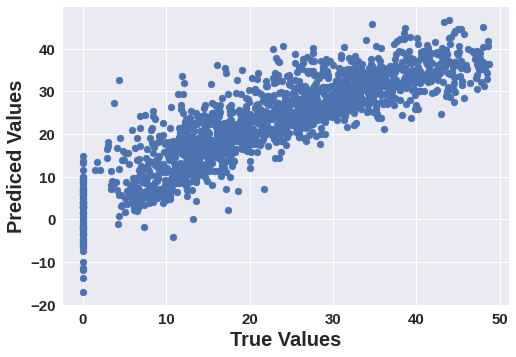

In [237]:
#Analysing Predicted & True Values
plt.scatter(y_test,y_prediction_test)
plt.xlabel('True Values'), plt.ylabel('Prediced Values')
plt.show()

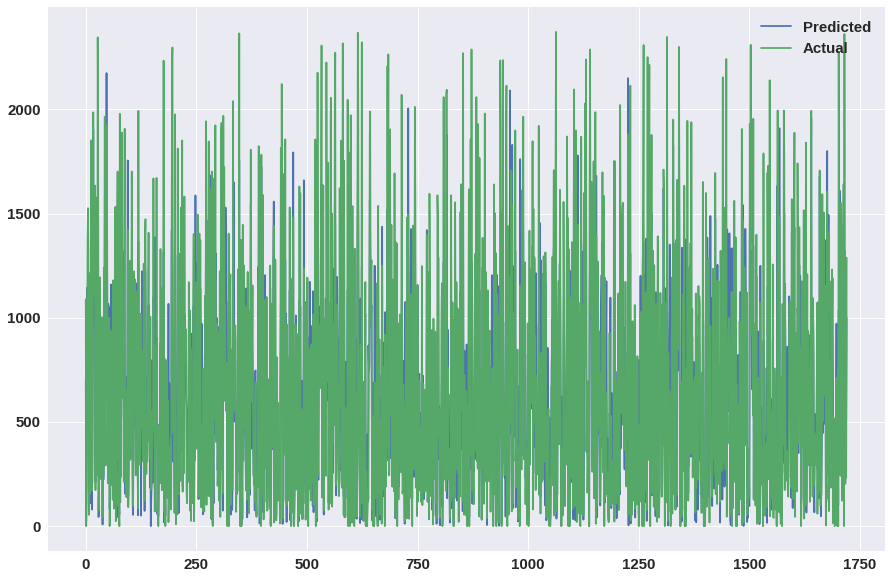

In [238]:
#creating plot between actual and predicted value
plt.figure(figsize=(15,10))
plt.plot((y_prediction_test*y_prediction_test))
plt.plot((np.array(y_test*y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


**Insights**

* By linear regression model we are getting R2_score is equal to .671 and root mean squared error is 335 on test data, similar for training data,our model performace is same on training and test data.
* Now we will do cross validation and regulerization on linear regression model and also build different model so that we can compare which model performance is better.

# **Implementing Elasic Net regulerization**

In [239]:
# importing elastic net
from sklearn.linear_model import ElasticNet
elasticnet= ElasticNet(alpha=0.01,l1_ratio=0.8)

In [240]:
# fitting data
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.01, l1_ratio=0.8)

In [241]:
# making prediction on test data 
y_pred_en=elasticnet.predict(X_test)

In [242]:
#Evaluating metrices on test data
MSE  = np.round(mean_squared_error((y_test*y_test), (y_pred_en*y_pred_en)))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score((y_test*y_test), (y_pred_en*y_pred_en)),3)
print("R2 :" ,r2)

MSE : 106826.0
RMSE : 327.0
R2 : 0.683


After using elastic net R2 score remain same so let's do cross validation and parameter tunning if we can improve our model performance

# **Cross validation and Hyperparameter tunning**

In [243]:
#Cross validation and hyper parameter tunning 
from sklearn.model_selection import GridSearchCV
elastic = ElasticNet()
parameters = {'alpha': [1e-30,1e-28,1e-26,1e-24,1e-22,1e-20,1e-18,1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40],'l1_ratio':[.0001,.001,.01,.1,.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,.10,.11,.12,.13,.14,.15,.20,.25,.30,.35]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='r2',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-30, 1e-28, 1e-26, 1e-24, 1e-22, 1e-20,
                                   1e-18, 1e-15, 1e-13, 1e-10, 1e-08, 1e-05,
                                   0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6,
                                   7, 8, 9, 10, 15, 20, 25, 30, ...],
                         'l1_ratio': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4,
                                      0.5, 0.6, 0.7, 0.8, 0.9, 0.1, 0.11, 0.12,
                                      0.13, 0.14, 0.15, 0.2, 0.25, 0.3, 0.35]},
             scoring='r2')

In [244]:
#making prediction on test data
y_pred_elastic = elastic_regressor.predict(X_test)

In [245]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.7}

Using  {'alpha': 0.0001, 'l1_ratio': 0.7}  the negative mean squared error is:  0.749303364330598


We have given different alpha and l1-ratio value, so the best alpha value is 0.0001 and l1-ratio is 0.8 ,if we evalute our model on r_2score.

In [246]:
MSE  =np.round(mean_squared_error((y_test*y_test), (y_pred_elastic*y_pred_elastic)))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 = np.round(r2_score((y_test*y_test), (y_pred_elastic*y_pred_elastic)),3)
print("R2 :" ,r2)

MSE : 103268.0
RMSE : 321.0
R2 : 0.693


# **Insights**

From the above evalution metrices we can say that Linear regression model is performing well than elastic Net,
Now let's build other model so that we can compare all other model.

In [247]:
#Residual error
resi_error = y_test-y_pred_elastic

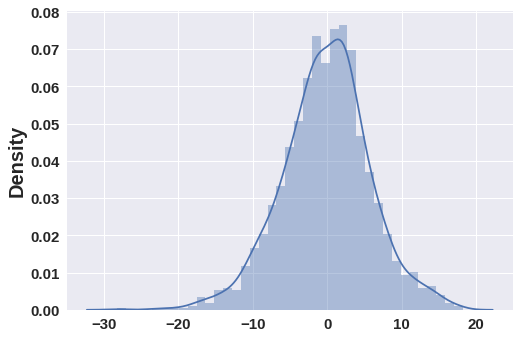

In [248]:
sns.distplot(resi_error)

# **Polynomial Model**
## **Implimentation of Polynomial Model**

In [249]:
from sklearn.preprocessing import PolynomialFeatures
# Applying Polynomial Linear Regression
# degree 2
poly_reg = PolynomialFeatures(degree = 2,include_bias=True)
#Transforming into Polynomial
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
lin_reg = LinearRegression()
#Fitting the training dataset
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [250]:
#Prediction on training & testing dataset
y_pred_poly_train = lin_reg.predict(X_poly)
y_pred_poly_test=lin_reg.predict(X_poly_test)

# **Evaluating metrices**

In [251]:
#Evaluation metrices on train data
MSE  =np.round(mean_squared_error(y_train*y_train,y_pred_poly_train*y_pred_poly_train))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_train*y_train,y_pred_poly_train*y_pred_poly_train),3)
print("R2 score:" ,r2)
A_r2=np.round(1-(1-r2_score(y_train*y_train,y_pred_poly_train*y_pred_poly_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",A_r2)

MSE : 71578.0
RMSE : 268.0
R2 score: 0.796
Adjusted R2 :  0.794


In [252]:
#Evaluation metrices on test data
MSE  = np.round(mean_squared_error(y_test*y_test,y_pred_poly_test*y_pred_poly_test),2)
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test*y_test,y_pred_poly_test*y_pred_poly_test),3)
print("R2 score:" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test*y_test,y_pred_poly_test*y_pred_poly_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)


MSE : 77098.88
RMSE : 277.67
R2 score: 0.771
Adjusted R2 :  0.769


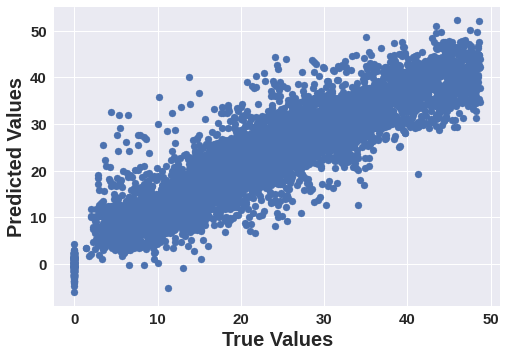

In [253]:
#Visualising predicted and true values
plt.scatter(y_train,y_pred_poly_train)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()


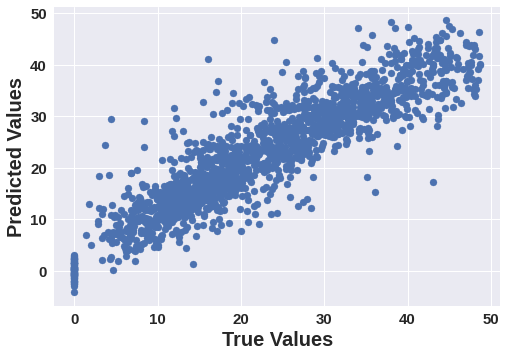

In [254]:
#Visualising True & Predicted Values
plt.scatter(y_test,y_pred_poly_test)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()


In [255]:
# residual error
e_poly = y_test - y_pred_poly_test 


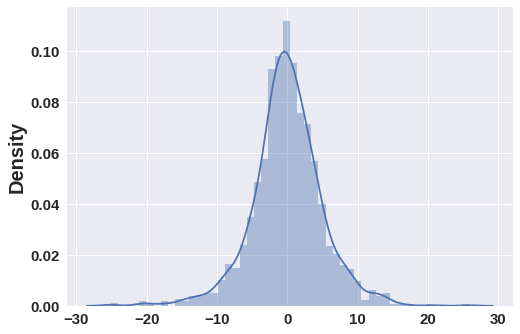

In [256]:
#Residual Analysis
sns.distplot(e_poly)
plt.show()

# **Decision tree model**
## **implementing Decision tree**
* Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

* multicollinearity does not affect the prediction of model but we are not only looking for prediction ,we will use decision tree to extract the feature importance for further analysis and then Multicollinearity may have some bad effects, it makes the coefficients (feature importances) unstable and incorrect.

* Because of feature importance and model explainbility ,i am removing correlated feature.

* In ealier in linear regression model we have seen that 'Dew point temperature(°C)' ,'Seasons_Summer', 'Seasons_Winter' are correlated with tempreture so let's remove these columns.

In [257]:
#removing root rented bike count column 
bike_df_copy.drop('Root_rented_bike_count',axis=1,inplace=True)
#removing correlated features
bike_df_copy.drop('Dew point temperature(°C)',axis=1,inplace=True)
bike_df_copy.shape

(8602, 16)

In [258]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8602 non-null   int64  
 1   Temperature(°C)          8602 non-null   float64
 2   Humidity(%)              8602 non-null   int64  
 3   Wind speed (m/s)         8602 non-null   float64
 4   Visibility (10m)         8602 non-null   int64  
 5   Solar Radiation (MJ/m2)  8602 non-null   float64
 6   Rainfall(mm)             8602 non-null   float64
 7   Snowfall (cm)            8602 non-null   float64
 8   Holiday                  8602 non-null   int64  
 9   Functioning Day          8602 non-null   int64  
 10  Seasons_Autumn           8602 non-null   uint8  
 11  Seasons_Spring           8602 non-null   uint8  
 12  Seasons_Summer           8602 non-null   uint8  
 13  Seasons_Winter           8602 non-null   uint8  
 14  month_year_bins         

In [259]:
#importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [260]:
x= bike_df_copy.drop('Rented Bike Count', axis=1)

In [261]:
#creating dependent and independent for model
dependent_variable_tree='Rented Bike Count'
independent_variable_tree=list(set(bike_df_copy.columns.tolist()) - {dependent_variable_tree})


In [262]:
independent_variable_tree

['Visibility (10m)',
 'Humidity(%)',
 'Temperature(°C)',
 'Rainfall(mm)',
 'Solar Radiation (MJ/m2)',
 'Hour_bins',
 'month_year_bins',
 'Seasons_Summer',
 'Holiday',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Seasons_Spring',
 'Seasons_Autumn',
 'Seasons_Winter',
 'Functioning Day']

In [263]:
# Create the data of independent variables
X_tree=bike_df_copy[independent_variable_tree].values

# Create the for dependent variable data
y_tree=bike_df_copy[dependent_variable_tree].values

In [264]:
#splitting data into training and test data
X_train_tree, X_test_tree, y_train_tree, y_test_tree=train_test_split(X_tree, y_tree, test_size=0.20, random_state=0)

In [265]:
6#fitting data to decision tree
Decision_regressor=DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None, max_features=None, max_leaf_nodes=None,splitter='best',min_samples_split=2, min_samples_leaf=5) 
Decision_regressor.fit(X_train_tree, y_train_tree)

DecisionTreeRegressor(min_samples_leaf=5)

In [266]:
#predicting on train and test data
y_predicted_train_tree=Decision_regressor.predict(X_train_tree)
y_predicted_test_tree=Decision_regressor.predict(X_test_tree)

# **Evaluating metrices**

In [267]:
#Evaluating metrices(Train)
MSE  =np.round(mean_squared_error(y_train_tree,y_predicted_train_tree))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_train_tree,y_predicted_train_tree),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_train_tree,y_predicted_train_tree))*((X_train_tree.shape[0]-1)/(X_train_tree.shape[0]-X_train_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 23938.0
RMSE : 155.0
R2 : 0.932
Adjusted R2 :  0.932


In [268]:
#Evaluating metrices(Test)
MSE  =mean_squared_error(y_test_tree,y_predicted_test_tree)
print("MSE :" , MSE)

RMSE =np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test_tree,y_predicted_test_tree),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test_tree,y_predicted_test_tree))*((X_test_tree.shape[0]-1)/(X_test_tree.shape[0]-X_test_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 73879.66494666274
RMSE : 271.8081399565928
R2 : 0.781
Adjusted R2 :  0.779


* As we can see from above evalution metrices that with the help of decision tree regressor model we are able to improve our model performance compare to linear regression and Elastic net.

* Also on training data our model performing well but on test data we are getting less r2_score and also higher error.To overcome overfitting on training data ,we will do hyperparameter tunning.

* Now we will do hyperparameter tunning to find out best parameter of our decision tree model.

# **Cross validation and Hyperparameter tunning**

In [269]:
#defining parameter for model
parameters={"max_depth" : [1,2,3,5,7,9,11,12,15,20,25,50,100],
           "min_samples_leaf":[1,2,3,4,5,10,15,20,40,60,80,100],
           "max_leaf_nodes":[None,10,20,30,40,50,70,100,140,150]}

In [270]:
#building decision tree regression model with cross validation and hyper parameter tunning
reg_decision_model=DecisionTreeRegressor()
tuning_Decision_regressor=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3)
tuning_Decision_regressor.fit(X_train_tree, y_train_tree)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 5, 7, 9, 11, 12, 15, 20, 25, 50,
                                       100],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 70, 100,
                                            140, 150],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15, 20, 40, 60,
                                              80, 100]},
             scoring='neg_mean_squared_error')

In [271]:
#gettting best hyperparameter
tuning_Decision_regressor.best_params_

{'max_depth': 9, 'max_leaf_nodes': 100, 'min_samples_leaf': 1}

In [272]:
#prediction on train and test data
tune_y_train_pred=tuning_Decision_regressor.predict(X_train_tree)
tune_y_test_pred=tuning_Decision_regressor.predict(X_test_tree)

In [273]:
#Evaluating metrices(Train)
MSE  =np.round(mean_squared_error(y_train_tree,tune_y_train_pred))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_train_tree,tune_y_train_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_train_tree,tune_y_train_pred))*((X_train_tree.shape[0]-1)/(X_train_tree.shape[0]-X_train_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 51828.0
RMSE : 228.0
R2 : 0.852
Adjusted R2 :  0.852


In [274]:
#Evaluating metrices(Test)
MSE  =mean_squared_error(y_test_tree,tune_y_test_pred)
print("MSE :" , MSE)

RMSE =np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test_tree,tune_y_test_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test_tree,tune_y_test_pred))*((X_test_tree.shape[0]-1)/(X_test_tree.shape[0]-X_test_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 70380.48642354202
RMSE : 265.29320840070903
R2 : 0.791
Adjusted R2 :  0.789


# **cost_complexity_pruning_path**
* We can overcome overfitting by pruning of our tree as well.

* DecisionTree in sklearn has a function called cost_complexity_pruning_path, which gives the effective alphas of subtrees during pruning and also the corresponding impurities.

* In other words, we can use these values of alpha to prune our decision tree:

* We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeRegressor and we can find out alpha value where our test r2_score is higher and we gettting minimum error

In [275]:
Path=Decision_regressor.cost_complexity_pruning_path(X_train_tree,y_train_tree)
alphas=Path['ccp_alphas']
len(alphas)

886

### Let's fit every value of alpha in our model and find out on which value of alpha we are getting maximum r2_score

In [276]:
#fitting value of alpha in our model
accuracy_train,accuracy_test=[],[]
for i in alphas:
  tree=DecisionTreeRegressor(ccp_alpha=i)
  tree.fit(X_train_tree,y_train_tree)
  y_train_pred=tree.predict(X_train_tree)
  y_test_pred=tree.predict(X_test_tree)
  accuracy_train.append(r2_score(y_train_tree,y_train_pred))
  accuracy_test.append(r2_score(y_test_tree,y_test_pred))
index_max_test_accuracy=accuracy_test.index(max(accuracy_test))
alpha_at_max_test_accuracy=alphas[index_max_test_accuracy]

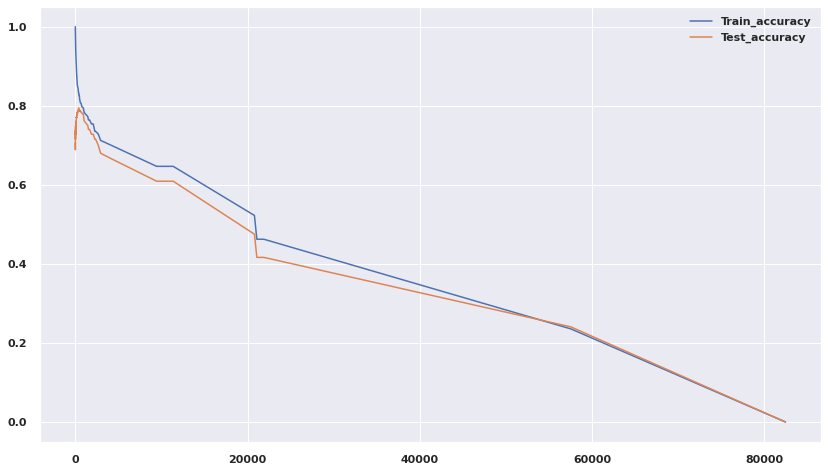

In [277]:
#Plotting train and test accuracy
sns.set()
plt.figure(figsize=(14,8))
sns.lineplot(y=accuracy_train,x=alphas,label='Train_accuracy')
sns.lineplot(y=accuracy_test,x=alphas,label='Test_accuracy')

### From the above plot we can say that our highest r2_score is near .7 ,at this point our train accuracy is decreased but our model is now more generalized,we also calucalted alpha value where we are getting maximum r2_score.

In [278]:
alpha_tree=DecisionTreeRegressor(ccp_alpha=alpha_at_max_test_accuracy)
alpha_tree.fit(X_train_tree,y_train_tree)
alpha_train_pred=alpha_tree.predict(X_train_tree)
alpha_test_pred=alpha_tree.predict(X_test_tree)
print(r2_score(y_train_tree,alpha_train_pred))
print(r2_score(y_test_tree,alpha_test_pred))

0.8313074611681633
0.7942480790182825


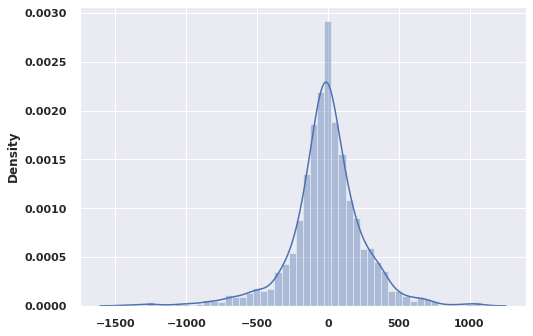

In [279]:
#Resiual error
resi_dt = y_test_tree-alpha_test_pred
sns.distplot(resi_dt)
plt.show()


# **Randon forest model**
## **Implimenting Randon forest model**

In [280]:
#fitting data to model
from sklearn.ensemble import RandomForestRegressor
#rfr =RandomForestRegressor(n_estimators= 100,ccp_alpha=0.0, criterion='mse',max_depth=11,max_leaf_nodes=None,max_samples=None,min_samples_leaf=20,min_samples_split=2)
rfr=RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(X_train_tree, y_train_tree)

RandomForestRegressor(random_state=42)

In [281]:
#prediction on train and test data
random_y_train_pred=rfr.predict(X_train_tree)
random_y_test_pred=rfr.predict(X_test_tree)

**Evaluating metrices**

In [282]:
#Evaluating metrices(Train)
MSE  =np.round(mean_squared_error(y_train_tree,random_y_train_pred))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_train_tree,random_y_train_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_train_tree,random_y_train_pred))*((X_train_tree.shape[0]-1)/(X_train_tree.shape[0]-X_train_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 6873.0
RMSE : 83.0
R2 : 0.98
Adjusted R2 :  0.98


In [283]:
#Evaluating metrices(Test)
MSE  =mean_squared_error(y_test_tree,random_y_test_pred)
print("MSE :" , MSE)

RMSE =np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test_tree,random_y_test_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test_tree,random_y_test_pred))*((X_test_tree.shape[0]-1)/(X_test_tree.shape[0]-X_test_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 49588.70062783265
RMSE : 222.68520522888954
R2 : 0.853
Adjusted R2 :  0.851


In [284]:
#Resiual error
resi_rf = y_test_tree-random_y_test_pred

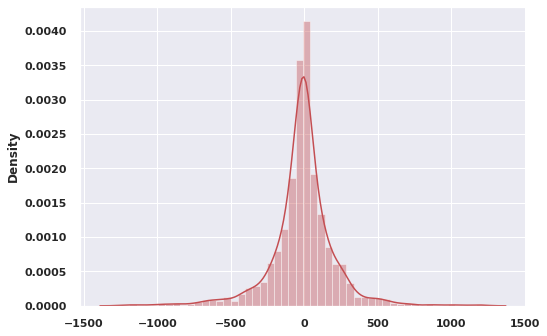

In [285]:
sns.distplot(resi_rf,color='r')
plt.show()

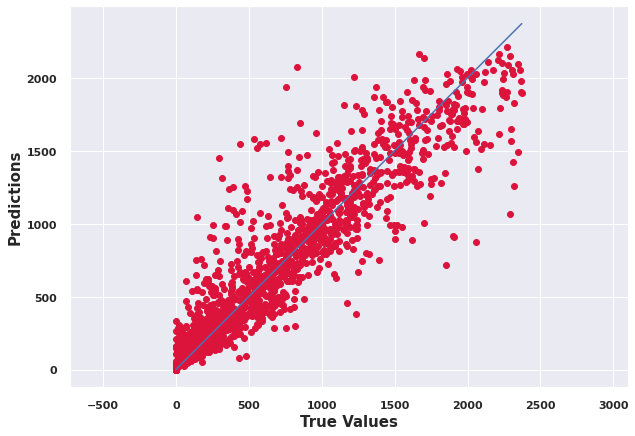

In [286]:
#plotting actual and predicted value
plt.figure(figsize=(10,7))
plt.scatter(y_test_tree,random_y_test_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(random_y_test_pred), max(y_test_tree))
p2 = min(min(random_y_test_pred), min(y_test_tree))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# **Gradient Boosting**
## **Implimenting Gradient Booting model**

In [287]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [288]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb,param_grid=params,verbose=0)

In [289]:
# Create the data of independent variables
X_boost=bike_df_copy[independent_variable_tree].values

# Create the for dependent variable data
y_boost=bike_df_copy[dependent_variable_tree].values

In [290]:
gb_grid.fit(X_boost, y_boost)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [15, 20, 30],
                         'n_estimators': [80, 100, 150]})

In [291]:
gb_grid.best_params_

{'max_depth': 15, 'n_estimators': 150}

In [292]:
gb_grid.best_score_

0.3882032120617345

# **Evaluating metrices**

In [293]:
#Evaluating metrices(Train)
MSE  =np.round(mean_squared_error(y_train_tree,random_y_train_pred))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_train_tree,random_y_train_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_train_tree,random_y_train_pred))*((X_train_tree.shape[0]-1)/(X_train_tree.shape[0]-X_train_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 6873.0
RMSE : 83.0
R2 : 0.98
Adjusted R2 :  0.98


In [294]:
#Evaluating metrices(Test)
MSE  =mean_squared_error(y_test_tree,random_y_test_pred)
print("MSE :" , MSE)

RMSE =np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test_tree,random_y_test_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test_tree,random_y_test_pred))*((X_test_tree.shape[0]-1)/(X_test_tree.shape[0]-X_test_tree.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)


MSE : 49588.70062783265
RMSE : 222.68520522888954
R2 : 0.853
Adjusted R2 :  0.851


# **XG-boost Model**
## **Implimenting XG-boost model**

In [295]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [296]:
# Number of trees
n_estimators = [200,250]

# Maximum depth of trees
max_depth = [6,8,10]

# Child weight
min_child_weight= [8,10,12]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,'min_child_weight': min_child_weight }

param_dict

{'n_estimators': [200, 250],
 'max_depth': [6, 8, 10],
 'min_child_weight': [8, 10, 12]}

In [297]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree=train_test_split(X_tree, y_tree, test_size=0.20, random_state=0)

In [298]:
XGB = xgb.XGBRegressor()

# Grid search
XGB_grid = GridSearchCV(estimator = XGB,
                       param_grid = param_dict,
                       cv = 3, verbose=2, n_jobs=-1, scoring = 'r2' )
XGB_grid.fit(X_train_tree, y_train_tree)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[12:59:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10],
                         'min_child_weight': [8, 10, 12],
                         'n_estimators': [200, 250]},
             scoring='r2', verbose=2)

In [299]:
XGB_grid.best_score_

0.8562178075840876

In [300]:
XGB_grid.best_params_

{'max_depth': 6, 'min_child_weight': 12, 'n_estimators': 200}

In [301]:
XGB_optimal_model = XGB_grid.best_estimator_
XGB_optimal_model

XGBRegressor(max_depth=6, min_child_weight=12, n_estimators=200)

In [302]:
XGB_y_pred_train = XGB_optimal_model.predict(X_train_tree)   # Prediction for train dataset
XGB_y_pred_test = XGB_optimal_model.predict(X_test_tree)     # Predictionfor test dataset


# **Evaluating metrices**

In [303]:
# Finding the Evaluation Metrics(Train)
MSE  = mean_squared_error(y_train_tree,XGB_y_pred_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_train_tree,XGB_y_pred_train)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_train_tree, XGB_y_pred_train))*((X_train_tree.shape[0]-1)/(X_train_tree.shape[0]-X_train_tree.shape[1]-1)))

MSE : 24071.70616338348
RMSE : 155.15059188860184
R2 : 0.9312749815049925
Adjusted R2 :  0.9311248175898541


In [304]:
# Finding the Evaluation Metrics(Test)
MSE  = mean_squared_error(y_test_tree,XGB_y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test_tree,XGB_y_pred_test)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test_tree, XGB_y_pred_test))*((X_test_tree.shape[0]-1)/(X_test_tree.shape[0]-X_test_tree.shape[1]-1)))

MSE : 46316.67063213411
RMSE : 215.21308192610903
R2 : 0.8623988619853101
Adjusted R2 :  0.8611882947887


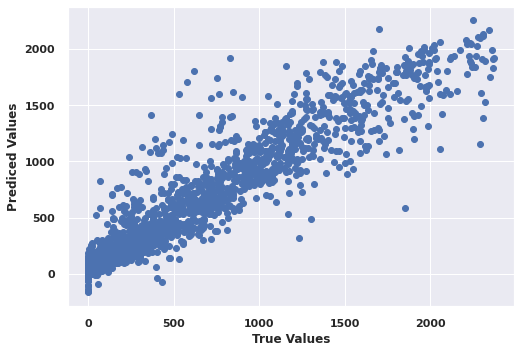

In [305]:
plt.scatter(y_test_tree,XGB_y_pred_test)
plt.xlabel('True Values'), plt.ylabel('Prediced Values')
plt.show()

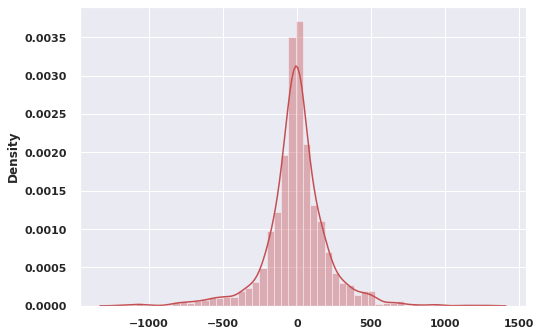

In [306]:
#Resiual error
resi_XG = y_test_tree-XGB_y_pred_test
sns.distplot(resi_XG,color='r')
plt.show()

# **Comparision of Models**

In [307]:
Comparision_dict={'Model_Name':['Linear Regression', 'Polynomial Model','Decision Tree', 'Random Forest','Gradient Boosting', 'XGBoost'],
                  'Training_R_score':[0.703,0.789,0.932,0.98,0.98,0.9470],
                  'Test_R-squared':[0.6948,0.766,0.795,0.852,0.852,0.8662 ],
                  'RMSE':[318.97,280.49,253.35,222.06,223.35,216.83],
                  'Adjusted R-Squared':[0.702,0.765,0.792,0.851,0.85,0.8619]} 

In [308]:
Comparisione_df=pd.DataFrame(Comparision_dict)
Comparisione_df

,Model_Name,Training_R_score,Test_R-squared,RMSE,Adjusted R-Squared
0,Linear Regression,0.703,0.6948,318.97,0.7020
1,Polynomial Model,0.789,0.7660,280.49,0.7650
2,Decision Tree,0.932,0.7950,253.35,0.7920
3,Random Forest,0.980,0.8520,222.06,0.8510
4,Gradient Boosting,0.980,0.8520,223.35,0.8500
5,XGBoost,0.947,0.8662,216.83,0.8619


In [309]:
def barplots(x,y):
    plt.figure(figsize=(10,5))
    sns.barplot(data=Comparisione_df, x='Model_Name', y=y, palette='ch:s=-.2,r=.6')

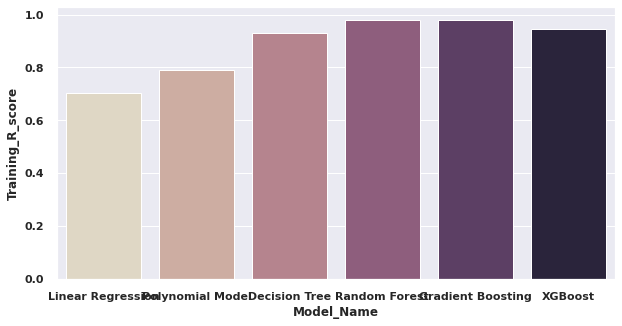

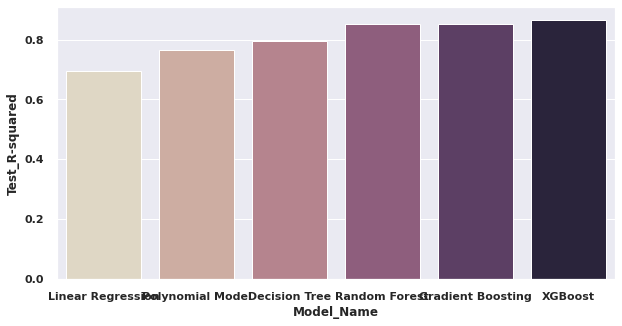

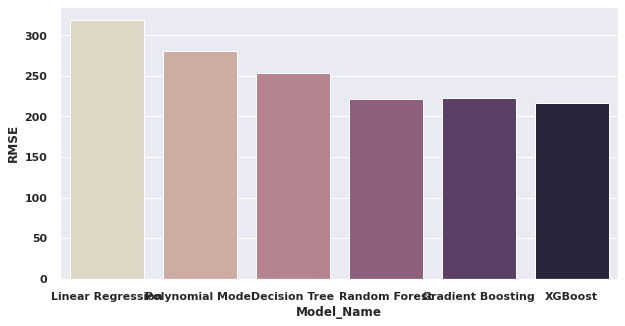

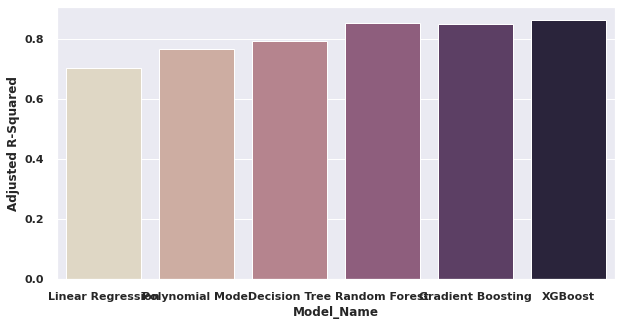

In [310]:
y=['Training_R_score','Test_R-squared','RMSE','Adjusted R-Squared']
for i in y:
    barplots('Model_Name',i)
    plt.show()

# **Features Important**

In [311]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

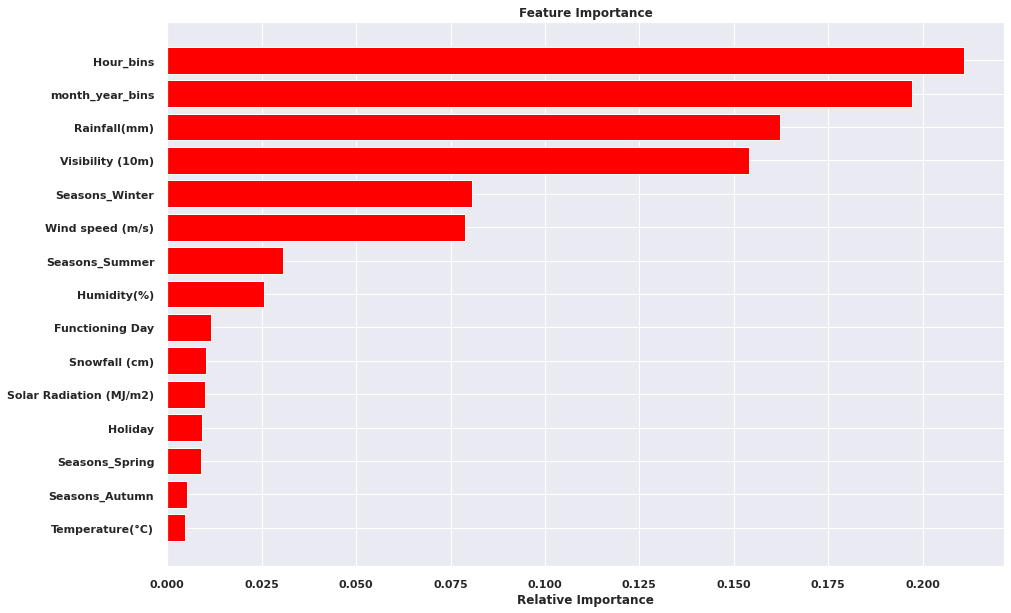

In [312]:
get_features_importance(XGB_optimal_model,x)

# **Conclusion:-**
From above model we can conclude the below point:

Rented Bike Count is very much dependent :-

1. At what Temperature the Bike is rented.

2. On what Hour the Bike is rented.

3. How much Humidity present in the atmosphere.

4. Is it a functioning day or not.

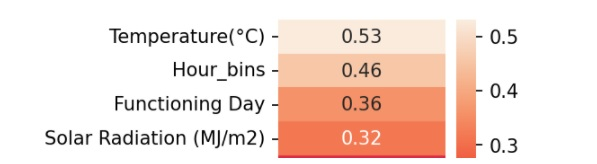